<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Sale Price Prediction

### Contents:
- [Executive Summary](#Executive-Summary)
- [Problem Statement](#Problem-Statement)
- [Background & Research](#Background-&-Research)
- [Data Wrangling](#Data-Wrangling)
- [Exploration & Visualisation](#Exploration-&-Visualisation)
- [Pre-Processing & Modelling](#Pre-Processing-&-Modelling)
- [Kaggle Prediction](#Kaggle-Prediction)
- [Results & Analysis](#Results-&-Analysis)
- [Recommendations & Conclusions](#Recommendations-&-Conclusions)
- [References](#References)

## Executive Summary

In the real estate market, housing prices are determined by the attributes of the property itself and by the characteristics of the neighbourhood within which it resides. This method of pricing is known as hedonic pricing. It is reasonable to expect internal factors (such as property size) and external factors (such as availability of amenities) to have an impact on housing prices. The attributes and characteristics that are believed to have a considerable impact on housing prices were selected. This project aims to help real estate buyers and sellers predict the price of a house in Ames, Iowa based on a set of property- and neighbourhood-specific traits. The prediction will be made with the best linear regression model as evaluated by R-Squared and Mean Squared Error. Three linear regression models (Ordinary Least Squares, Ridge, Lasso) were evaluated. The entire dataset was first split into a training dataset and a testing dataset. After cross validation on the training dataset, the models had an R-Squared of around 0.78 and a Mean Squared Error of around 1.28 billion. When fitted on the training dataset and testing dataset, the models had an R-Squared of around 0.81 on the training dataset and around 0.83 for the testing dataset, and a Mean Squared Error of around 1.11 billion on the training dataset and around 1.08 billion on the testing dataset. Lasso was selected as the model of choice. After training on the entire dataset, the final R-Squared obtained was 0.82 while the final Mean Squared Error obtained was 1.07 billion. The Lasso model outperformed the Null model, which gave a baseline R-Squared of 0.00 and a baseline Mean Squared Error of 6.28 billion. The 5 biggest determinants of housing sale price were found to be Above Ground Living Area, Kitchen Quality, Location Rank, Total Basement Area, and Garage Area. Interested real estate buyers and sellers may utilise this model to predict the price of a house in Ames, Iowa and make more informed buy-sell decisions. Buyers will be able to know if they are under- or over-paying for a house at the current quoted market price, and sellers will be able know if they are under- or over-asking for their house with reference to how much a house like theirs has sold for historically.

## Problem Statement

This project aims to help real estate buyers and sellers predict the price of a house in Ames, Iowa based on a set of property- and neighbourhood-specific traits and decide if the current quoted market price is above or below what the house would reasonably be bought or sold at. The prediction will be made with the best linear regression model amongst the trio (Ordinary Least Squares, Ridge, Lasso) as evaluated by R-Squared and Mean Squared Error.

## Background & Research

In the real estate market, housing prices are determined by the attributes of the property itself and by the characteristics of the neighbourhood within which it resides. ([*source*](https://www.investopedia.com/terms/h/hedonicpricing.asp)) This method of pricing a marketed good is known as hedonic pricing, wherein an item is treated as the sum of its individual qualities that cannot be sold separately in the market, with the objective of estimating the extent to which each of these qualities affect the market price of the item. ([*source*](https://link.springer.com/referenceworkentry/10.1007%2F978-94-007-0753-5_1279))

Hedonic pricing is used traditionally to estimate economic values for environmental or ecosystem services that directly affect market prices. ([*source*](https://www.ecosystemvaluation.org/hedonic_pricing.htm)) Essentially, the basic premise of the hedonic pricing method is that the price of a marketed good is related to its traits. ([*source*](https://www.ecosystemvaluation.org/hedonic_pricing.htm))

With respect to housing prices, it is reasonable to expect internal factors (such as property size, age, material quality, physical condition, and features like fireplaces or pools) and external factors (such as availability of amenities, proximity to public transportation, crime rate, socioeconomic status of households, and level of air or water pollution) to have an impact on housing prices. ([*source*](https://www.investopedia.com/terms/h/hedonicpricing.asp)) The attributes and characteristics that are believed to have a considerable impact on housing prices were selected as the starting features for the development of the predictive model.

## Data Wrangling

### Data Sources

The following data sources were used:

* [`train.csv`](./data/train.csv): 2006-2010 Ames Housing Dataset For Model Training

This model training dataset contains information on various features and the sale price of houses sold in Ames, Iowa from 2006 to 2010.

* [`test.csv`](./data/test.csv): 2006-2010 Ames Housing Dataset For Model Testing

This model testing dataset contains information on various features of houses sold in Ames, Iowa from 2006 to 2010.

### Data Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler 

pd.set_option('display.max.columns', None)

In [2]:
# import dataset
train = pd.read_csv('../data/train.csv')

In [3]:
# check number of rows and cols
train.shape

(2051, 81)

In [4]:
# remove spaces from column names
train.columns = train.columns.str.replace(' ', '')

In [5]:
# show first 5 rows
train.head()

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### Feature Selection

In [6]:
# create a copy of the dataset with just the feature and target columns of interest
Xy = train[['LotArea', 'LotFrontage', 'LotShape', 'LotConfig', 'LandContour', 'LandSlope', 
            'Neighborhood', 'Condition1', 'Condition2', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 
            'Functional', 'YearRemod/Add', 'BsmtQual', 'BsmtCond', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 
            'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
            'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageArea', 'GarageQual', 'GarageCond', 
            'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'YrSold', 
            'SalePrice']].copy()

In [7]:
# show first 5 rows
Xy.head()

,LotArea,LotFrontage,LotShape,LotConfig,LandContour,LandSlope,Neighborhood,Condition1,Condition2,OverallQual,OverallCond,ExterQual,ExterCond,Functional,YearRemod/Add,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SalePrice
0,13517,NaN,IR1,CulDSac,Lvl,Gtl,Sawyer,RRAe,Norm,6,8,Gd,TA,Typ,2005,TA,TA,725.0,Ex,Y,1479,0.0,0.0,2,1,3,1,Gd,0,NaN,475.0,TA,TA,0,44,0,0,0,0,2010,130500
1,11492,43.0,IR1,CulDSac,Lvl,Gtl,SawyerW,Norm,Norm,7,5,Gd,TA,Typ,1997,Gd,TA,913.0,Ex,Y,2122,1.0,0.0,2,1,4,1,Gd,1,TA,559.0,TA,TA,0,74,0,0,0,0,2009,220000
2,7922,68.0,Reg,Inside,Lvl,Gtl,NAmes,Norm,Norm,5,7,TA,Gd,Typ,2007,TA,TA,1057.0,TA,Y,1057,1.0,0.0,1,0,3,1,Gd,0,NaN,246.0,TA,TA,0,52,0,0,0,0,2010,109000
3,9802,73.0,Reg,Inside,Lvl,Gtl,Timber,Norm,Norm,5,5,TA,TA,Typ,2007,Gd,TA,384.0,Gd,Y,1444,0.0,0.0,2,1,3,1,TA,0,NaN,400.0,TA,TA,100,0,0,0,0,0,2010,174000
4,14235,82.0,IR1,Inside,Lvl,Gtl,SawyerW,Norm,Norm,6,8,TA,TA,Typ,1993,Fa,Gd,676.0,TA,Y,1445,0.0,0.0,2,0,3,1,TA,0,NaN,484.0,TA,TA,0,59,0,0,0,0,2010,138500


### Data Cleaning

In [8]:
# check for null values
Xy.isnull().sum().to_frame().T

,LotArea,LotFrontage,LotShape,LotConfig,LandContour,LandSlope,Neighborhood,Condition1,Condition2,OverallQual,OverallCond,ExterQual,ExterCond,Functional,YearRemod/Add,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SalePrice
0,0,330,0,0,0,0,0,0,0,0,0,0,0,0,0,55,55,1,0,0,0,2,2,0,0,0,0,0,0,1000,1,114,114,0,0,0,0,0,0,0,0


Mean Lot Frontage Before Mean Imputation: 69.05520046484602
Mean Lot Frontage After Mean Imputation: 69.05520046484634


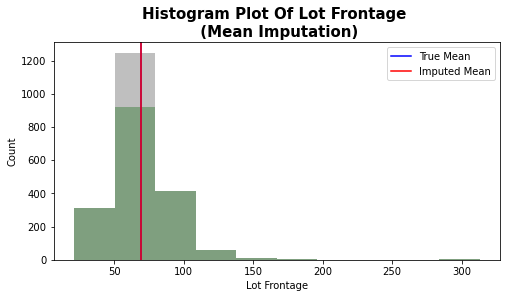

In [9]:
# visualise lot frontage before and after mean imputation
print('Mean Lot Frontage Before Mean Imputation:', Xy['LotFrontage'].mean())
print('Mean Lot Frontage After Mean Imputation:', 
      Xy['LotFrontage'].replace(np.nan, Xy['LotFrontage'].mean()).mean())

plt.figure(figsize=(8, 4))

plt.title('Histogram Plot Of Lot Frontage \n (Mean Imputation)', fontweight='semibold', fontsize=15)
plt.xlabel('Lot Frontage')
plt.ylabel('Count')
plt.axvline(Xy['LotFrontage'].mean(), color='blue', label='True Mean')
plt.axvline((Xy['LotFrontage'].replace(np.nan, Xy['LotFrontage'].mean()).mean()), color='red', label='Imputed Mean')
plt.hist(Xy['LotFrontage'], color='green', alpha=0.5)
plt.hist(Xy['LotFrontage'].replace(np.nan, Xy['LotFrontage'].mean()), color='grey', alpha=0.5)

plt.legend();

Mean Lot Frontage Before Median Imputation: 69.05520046484602
Mean Lot Frontage After Median Imputation: 68.88542174549


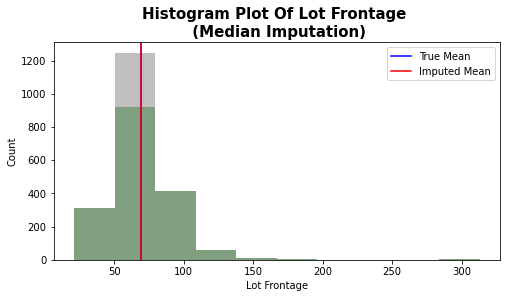

In [10]:
# visualise lot frontage before and after median imputation
print('Mean Lot Frontage Before Median Imputation:', Xy['LotFrontage'].mean())
print('Mean Lot Frontage After Median Imputation:', 
      Xy['LotFrontage'].replace(np.nan, Xy['LotFrontage'].median()).mean())

plt.figure(figsize=(8, 4))

plt.title('Histogram Plot Of Lot Frontage \n (Median Imputation)', fontweight='semibold', fontsize=15)
plt.xlabel('Lot Frontage')
plt.ylabel('Count')
plt.axvline(Xy['LotFrontage'].mean(), color='blue', label='True Mean')
plt.axvline((Xy['LotFrontage'].replace(np.nan, Xy['LotFrontage'].median()).mean()), color='red', label='Imputed Mean')
plt.hist(Xy['LotFrontage'], color='green', alpha=0.5)
plt.hist(Xy['LotFrontage'].replace(np.nan, Xy['LotFrontage'].median()), color='grey', alpha=0.5)

plt.legend();

In [11]:
# check out mean lot frontage for each category of lot configuration
Xy.groupby('LotConfig', as_index=False)[['LotFrontage']].mean()

,LotConfig,LotFrontage
0,Corner,83.245552
1,CulDSac,55.228571
2,FR2,60.836735
3,FR3,87.000000
4,Inside,66.952780


In [12]:
# impute null values in lot frontage with the mean of each category of lot configuration
Xy_mean_imp = Xy[['LotFrontage', 'LotConfig']].copy()

Xy_mean_imp.loc[(Xy_mean_imp['LotFrontage'].isna()) & (Xy_mean_imp['LotConfig'] == 'Corner'), 'LotFrontage'] = 83.25
Xy_mean_imp.loc[(Xy_mean_imp['LotFrontage'].isna()) & (Xy_mean_imp['LotConfig'] == 'CulDSac'), 'LotFrontage'] = 55.23
Xy_mean_imp.loc[(Xy_mean_imp['LotFrontage'].isna()) & (Xy_mean_imp['LotConfig'] == 'FR2'), 'LotFrontage'] = 60.84
Xy_mean_imp.loc[(Xy_mean_imp['LotFrontage'].isna()) & (Xy_mean_imp['LotConfig'] == 'FR3'), 'LotFrontage'] = 87.00
Xy_mean_imp.loc[(Xy_mean_imp['LotFrontage'].isna()) & (Xy_mean_imp['LotConfig'] == 'Inside'), 'LotFrontage'] = 66.95

Mean Lot Frontage Before Mean Imputation By Lot Configuration: 69.05520046484602
Mean Lot Frontage After Mean Imputation By Lot Configuration: 68.87738664066298


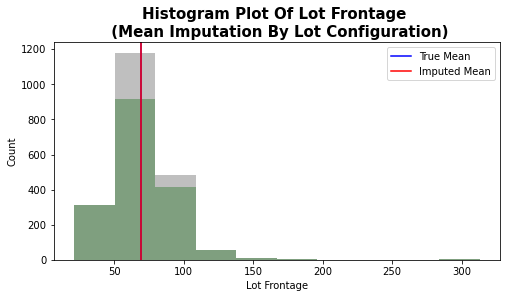

In [13]:
# visualise lot frontage before and after mean imputation by lot configuration
print('Mean Lot Frontage Before Mean Imputation By Lot Configuration:', Xy['LotFrontage'].mean())
print('Mean Lot Frontage After Mean Imputation By Lot Configuration:', Xy_mean_imp['LotFrontage'].mean())

plt.figure(figsize=(8, 4))

plt.title('Histogram Plot Of Lot Frontage \n (Mean Imputation By Lot Configuration)', 
          fontweight='semibold', fontsize=15)
plt.xlabel('Lot Frontage')
plt.ylabel('Count')
plt.axvline(Xy['LotFrontage'].mean(), color='blue', label='True Mean')
plt.axvline(Xy_mean_imp['LotFrontage'].mean(), color='red', label='Imputed Mean')
plt.hist(Xy['LotFrontage'], color='green', alpha=0.5)
plt.hist(Xy_mean_imp['LotFrontage'], color='grey', alpha=0.5)

plt.legend();

In [14]:
# check out median lot frontage for each category of lot configuration
Xy.groupby('LotConfig', as_index=False)[['LotFrontage']].median()

,LotConfig,LotFrontage
0,Corner,80.0
1,CulDSac,50.0
2,FR2,60.0
3,FR3,80.0
4,Inside,66.0


In [15]:
# impute null values in lot frontage with the median of each category of lot configuration
Xy_med_imp = Xy[['LotFrontage', 'LotConfig']].copy()

Xy_med_imp.loc[(Xy_med_imp['LotFrontage'].isna()) & (Xy_med_imp['LotConfig'] == 'Corner'), 'LotFrontage'] = 80.00
Xy_med_imp.loc[(Xy_med_imp['LotFrontage'].isna()) & (Xy_med_imp['LotConfig'] == 'CulDSac'), 'LotFrontage'] = 50.00
Xy_med_imp.loc[(Xy_med_imp['LotFrontage'].isna()) & (Xy_med_imp['LotConfig'] == 'FR2'), 'LotFrontage'] = 60.00
Xy_med_imp.loc[(Xy_med_imp['LotFrontage'].isna()) & (Xy_med_imp['LotConfig'] == 'FR3'), 'LotFrontage'] = 80.00
Xy_med_imp.loc[(Xy_med_imp['LotFrontage'].isna()) & (Xy_med_imp['LotConfig'] == 'Inside'), 'LotFrontage'] = 66.00

Mean Lot Frontage Before Median Imputation By Lot Configuration: 69.05520046484602
Mean Lot Frontage After Median Imputation By Lot Configuration: 68.51974646513895


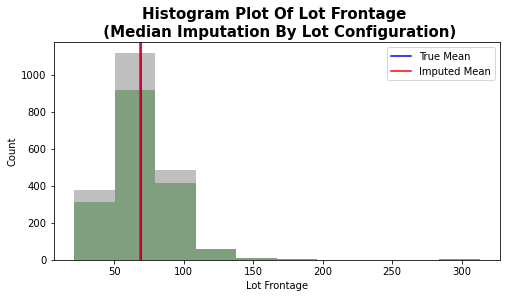

In [16]:
# visualise lot frontage before and after median imputation by lot configuration
print('Mean Lot Frontage Before Median Imputation By Lot Configuration:', Xy['LotFrontage'].mean())
print('Mean Lot Frontage After Median Imputation By Lot Configuration:', Xy_med_imp['LotFrontage'].mean())

plt.figure(figsize=(8, 4))

plt.title('Histogram Plot Of Lot Frontage \n (Median Imputation By Lot Configuration)', 
          fontweight='semibold', fontsize=15)
plt.xlabel('Lot Frontage')
plt.ylabel('Count')
plt.axvline(Xy['LotFrontage'].mean(), color='blue', label='True Mean')
plt.axvline(Xy_med_imp['LotFrontage'].mean(), color='red', label='Imputed Mean')
plt.hist(Xy['LotFrontage'], color='green', alpha=0.5)
plt.hist(Xy_med_imp['LotFrontage'], color='grey', alpha=0.5)

plt.legend();

**Decision:**

The null values in Lot Frontage were imputed using 4 approaches:
- Mean Lot Frontage
- Median Lot Frontage
- Mean Lot Frontage grouped by Lot Configuration
- Median Lot Frontage grouped by Lot Configuration

Imputing with the Mean Lot Frontage made the slightest change to the mean before and after imputation. It also made the smallest change to the underlying distribution. Hence, Mean Lot Frontage will be chosen as the method of imputation.

In [17]:
# impute null values in LotFrontage column in place with the mean
Xy['LotFrontage'].replace(np.nan, Xy['LotFrontage'].mean(), inplace=True)

# fill null values in all Bsmt columns with 0 as these houses do not have a basement
Xy['BsmtQual'] = Xy['BsmtQual'].fillna(0)
Xy['BsmtCond'] = Xy['BsmtCond'].fillna(0)
Xy['TotalBsmtSF'] = Xy['TotalBsmtSF'].fillna(0)
Xy['BsmtFullBath'] = Xy['BsmtFullBath'].fillna(0)
Xy['BsmtHalfBath'] = Xy['BsmtHalfBath'].fillna(0)

# fill null values in FireplaceQu column with 0 as these houses do not have a fireplace
Xy['FireplaceQu'] = Xy['FireplaceQu'].fillna(0)

# drop this one house with a garage but no values for garage area, garage quality, and garage condition
Xy.dropna(subset=['GarageArea'], inplace=True)
Xy.reset_index(drop=True, inplace=True)

# fill null values in GaraqeQual column and GarageCond column with 0 as these houses do not have a garage
Xy['GarageQual'] = Xy['GarageQual'].fillna(0)
Xy['GarageCond'] = Xy['GarageCond'].fillna(0)

In [18]:
# recheck for null values
Xy.isnull().sum().to_frame().T

,LotArea,LotFrontage,LotShape,LotConfig,LandContour,LandSlope,Neighborhood,Condition1,Condition2,OverallQual,OverallCond,ExterQual,ExterCond,Functional,YearRemod/Add,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SalePrice
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
# check column dtypes
Xy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        2050 non-null   int64  
 1   LotFrontage    2050 non-null   float64
 2   LotShape       2050 non-null   object 
 3   LotConfig      2050 non-null   object 
 4   LandContour    2050 non-null   object 
 5   LandSlope      2050 non-null   object 
 6   Neighborhood   2050 non-null   object 
 7   Condition1     2050 non-null   object 
 8   Condition2     2050 non-null   object 
 9   OverallQual    2050 non-null   int64  
 10  OverallCond    2050 non-null   int64  
 11  ExterQual      2050 non-null   object 
 12  ExterCond      2050 non-null   object 
 13  Functional     2050 non-null   object 
 14  YearRemod/Add  2050 non-null   int64  
 15  BsmtQual       2050 non-null   object 
 16  BsmtCond       2050 non-null   object 
 17  TotalBsmtSF    2050 non-null   float64
 18  HeatingQ

In [20]:
# convert column with dtypes 'float64' to 'int64'
for col in Xy.columns:
    if Xy[col].dtypes == 'float64':
        Xy[col] = Xy[col].astype('int64')

In [21]:
# recheck column dtypes
Xy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LotArea        2050 non-null   int64 
 1   LotFrontage    2050 non-null   int64 
 2   LotShape       2050 non-null   object
 3   LotConfig      2050 non-null   object
 4   LandContour    2050 non-null   object
 5   LandSlope      2050 non-null   object
 6   Neighborhood   2050 non-null   object
 7   Condition1     2050 non-null   object
 8   Condition2     2050 non-null   object
 9   OverallQual    2050 non-null   int64 
 10  OverallCond    2050 non-null   int64 
 11  ExterQual      2050 non-null   object
 12  ExterCond      2050 non-null   object
 13  Functional     2050 non-null   object
 14  YearRemod/Add  2050 non-null   int64 
 15  BsmtQual       2050 non-null   object
 16  BsmtCond       2050 non-null   object
 17  TotalBsmtSF    2050 non-null   int64 
 18  HeatingQC      2050 non-null

### Feature Engineering

In [22]:
# add feature-engineered columns
Xy['AgeSinceRemod/Add'] = Xy['YrSold'] - Xy['YearRemod/Add']
Xy['TotRms'] = Xy['BsmtFullBath'] + Xy['BsmtHalfBath'] + Xy['FullBath'] + Xy['HalfBath'] + \
Xy['BedroomAbvGr'] + Xy['KitchenAbvGr']
Xy['PorchArea'] = Xy['OpenPorchSF'] + Xy['EnclosedPorch'] + Xy['3SsnPorch'] + Xy['ScreenPorch']

In [23]:
# show first 5 rows
Xy.head()

,LotArea,LotFrontage,LotShape,LotConfig,LandContour,LandSlope,Neighborhood,Condition1,Condition2,OverallQual,OverallCond,ExterQual,ExterCond,Functional,YearRemod/Add,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SalePrice,AgeSinceRemod/Add,TotRms,PorchArea
0,13517,69,IR1,CulDSac,Lvl,Gtl,Sawyer,RRAe,Norm,6,8,Gd,TA,Typ,2005,TA,TA,725,Ex,Y,1479,0,0,2,1,3,1,Gd,0,0,475,TA,TA,0,44,0,0,0,0,2010,130500,5,7,44
1,11492,43,IR1,CulDSac,Lvl,Gtl,SawyerW,Norm,Norm,7,5,Gd,TA,Typ,1997,Gd,TA,913,Ex,Y,2122,1,0,2,1,4,1,Gd,1,TA,559,TA,TA,0,74,0,0,0,0,2009,220000,12,9,74
2,7922,68,Reg,Inside,Lvl,Gtl,NAmes,Norm,Norm,5,7,TA,Gd,Typ,2007,TA,TA,1057,TA,Y,1057,1,0,1,0,3,1,Gd,0,0,246,TA,TA,0,52,0,0,0,0,2010,109000,3,6,52
3,9802,73,Reg,Inside,Lvl,Gtl,Timber,Norm,Norm,5,5,TA,TA,Typ,2007,Gd,TA,384,Gd,Y,1444,0,0,2,1,3,1,TA,0,0,400,TA,TA,100,0,0,0,0,0,2010,174000,3,7,0
4,14235,82,IR1,Inside,Lvl,Gtl,SawyerW,Norm,Norm,6,8,TA,TA,Typ,1993,Fa,Gd,676,TA,Y,1445,0,0,2,0,3,1,TA,0,0,484,TA,TA,0,59,0,0,0,0,2010,138500,17,6,59


In [24]:
# find a way to determine the location desirability of each neighborhood

# create a True/False column to indicate if each house is near/adjacent to a positive off-site feature
Xy['PosOffSiteFeature'] = np.where(
    (Xy['Condition1'] == 'PosN') | 
    (Xy['Condition1'] == 'PosA') | 
    (Xy['Condition2'] == 'PosN') | 
    (Xy['Condition2'] == 'PosA'), 1, 0)

# create a True/False column to indicate if each house is of typical functionality
Xy['TypFunctional'] = np.where(
    (Xy['Functional'] == 'Typ'), 1, 0)

# create two columns that score the overall quality and overall condition of each house against the max score of 10
Xy['OverallQualScore'] = Xy['OverallQual'] / 10
Xy['OverallCondScore'] = Xy['OverallCond'] / 10

# represent ordinal values in exterior quality and exterior condition with numerical values
Xy['ExterQualScore'] = Xy['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
Xy['ExterCondScore'] = Xy['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

# create two columns that score the exterior quality and exterior condition of each house against the max score of 5
Xy['ExterQualScore'] = Xy['ExterQualScore'] / 5
Xy['ExterCondScore'] = Xy['ExterCondScore'] / 5

# create a column that scores the desirability of each house based on its proximity to a 
# positive off-site feature, typical functionality, overall quality score, overall condition score, 
# exterior quality score, and exterior condition score
Xy['DesirabilityScore'] = Xy['PosOffSiteFeature'] + Xy['TypFunctional'] + Xy['OverallQualScore'] + \
Xy['OverallCondScore'] + Xy['ExterQualScore'] + Xy['ExterCondScore']

# group houses by neighborhood and sort neighborhoods by their mean desirability score from smallest to largest
Xy.groupby('Neighborhood')['DesirabilityScore'].mean().sort_values()

# split the 28 neighborhoods into 4 ranks according to their mean desirability score
# neighborhoods with a smaller mean desirability score will be allocated a lower rank
# neighborhoods with a larger mean desirability score will be allocated a higher rank
rank1 = Xy.groupby('Neighborhood')['DesirabilityScore'].mean().sort_values()[0:7].index
rank2 = Xy.groupby('Neighborhood')['DesirabilityScore'].mean().sort_values()[7:14].index
rank3 = Xy.groupby('Neighborhood')['DesirabilityScore'].mean().sort_values()[14:21].index
rank4 = Xy.groupby('Neighborhood')['DesirabilityScore'].mean().sort_values()[21:28].index

# define a function to insert the location rank of each house based on its neighborhood
def insert_location_rank(nbh):
    if nbh in rank1:
        return 1
    elif nbh in rank2:
        return 2
    elif nbh in rank3:
        return 3
    elif nbh in rank4:
        return 4

# apply the function to the Neighborhood column to create a new column
Xy['LocationRank'] = Xy['Neighborhood'].apply(insert_location_rank)

In [25]:
# drop columns that were manufactured for the determination of the location rank of each neighborhood
Xy.drop(columns=['PosOffSiteFeature', 'TypFunctional', 'OverallQualScore', 'OverallCondScore', 
                 'ExterQualScore', 'ExterCondScore', 'DesirabilityScore'], inplace=True)

In [26]:
# show first 5 rows
Xy.head()

,LotArea,LotFrontage,LotShape,LotConfig,LandContour,LandSlope,Neighborhood,Condition1,Condition2,OverallQual,OverallCond,ExterQual,ExterCond,Functional,YearRemod/Add,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SalePrice,AgeSinceRemod/Add,TotRms,PorchArea,LocationRank
0,13517,69,IR1,CulDSac,Lvl,Gtl,Sawyer,RRAe,Norm,6,8,Gd,TA,Typ,2005,TA,TA,725,Ex,Y,1479,0,0,2,1,3,1,Gd,0,0,475,TA,TA,0,44,0,0,0,0,2010,130500,5,7,44,1
1,11492,43,IR1,CulDSac,Lvl,Gtl,SawyerW,Norm,Norm,7,5,Gd,TA,Typ,1997,Gd,TA,913,Ex,Y,2122,1,0,2,1,4,1,Gd,1,TA,559,TA,TA,0,74,0,0,0,0,2009,220000,12,9,74,3
2,7922,68,Reg,Inside,Lvl,Gtl,NAmes,Norm,Norm,5,7,TA,Gd,Typ,2007,TA,TA,1057,TA,Y,1057,1,0,1,0,3,1,Gd,0,0,246,TA,TA,0,52,0,0,0,0,2010,109000,3,6,52,2
3,9802,73,Reg,Inside,Lvl,Gtl,Timber,Norm,Norm,5,5,TA,TA,Typ,2007,Gd,TA,384,Gd,Y,1444,0,0,2,1,3,1,TA,0,0,400,TA,TA,100,0,0,0,0,0,2010,174000,3,7,0,3
4,14235,82,IR1,Inside,Lvl,Gtl,SawyerW,Norm,Norm,6,8,TA,TA,Typ,1993,Fa,Gd,676,TA,Y,1445,0,0,2,0,3,1,TA,0,0,484,TA,TA,0,59,0,0,0,0,2010,138500,17,6,59,3


In [27]:
# create a column for the interaction term between overall quality and overall condition
Xy['OverallQualCond'] = Xy['OverallQual'] * Xy['OverallCond']

# represent ordinal values in exterior quality and exterior condition with numerical values
Xy['ExterQual'] = Xy['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
Xy['ExterCond'] = Xy['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

# create a column for the interaction term between exterior quality and exterior condition
Xy['ExterQualCond'] = Xy['ExterQual'] * Xy['ExterCond']

# represent ordinal values in basement quality and basement condition with numerical values 
# (filled NA with 0 before for houses with no basement)
Xy['BsmtQual'] = Xy['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 0: 0})
Xy['BsmtCond'] = Xy['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 0: 0})

# create a column for the interaction term between basement quality and basement condition
Xy['BsmtQualCond'] = Xy['BsmtQual'] * Xy['BsmtCond']

# represent ordinal values in garage quality and garage condition with numerical values 
# (filled NA with 0 before for houses with no garage)
Xy['GarageQual'] = Xy['GarageQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 0: 0})
Xy['GarageCond'] = Xy['GarageCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 0: 0})

# create a column for the interaction term between garage quality and garage condition
Xy['GarageQualCond'] = Xy['GarageQual'] * Xy['GarageCond']

# represent ordinal values in heating quality and condition with numerical values
Xy['HeatingQC'] = Xy['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

# represent ordinal values in kitchen quality with numerical values
Xy['KitchenQual'] = Xy['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

# represent ordinal values in fireplace quality with numerical values (filled NA with 0 before for 
# houses with no fireplace)
Xy['FireplaceQu'] = Xy['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 0: 0})

# represent nominal values in central air conditioning with numerical values
Xy['CentralAir'] = Xy['CentralAir'].map({'Y': 1, 'N': 0})

In [28]:
# drop unnecessary columns
Xy.drop(columns=['Condition1', 'Condition2', 'Functional', 'YearRemod/Add', 
                 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], inplace=True)

In [29]:
# show first 5 rows
Xy.head()

,LotArea,LotFrontage,LotShape,LotConfig,LandContour,LandSlope,Neighborhood,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,PoolArea,YrSold,SalePrice,AgeSinceRemod/Add,TotRms,PorchArea,LocationRank,OverallQualCond,ExterQualCond,BsmtQualCond,GarageQualCond
0,13517,69,IR1,CulDSac,Lvl,Gtl,Sawyer,6,8,4,3,3,3,725,5,1,1479,4,0,0,475,3,3,0,0,2010,130500,5,7,44,1,48,12,9,9
1,11492,43,IR1,CulDSac,Lvl,Gtl,SawyerW,7,5,4,3,4,3,913,5,1,2122,4,1,3,559,3,3,0,0,2009,220000,12,9,74,3,35,12,12,9
2,7922,68,Reg,Inside,Lvl,Gtl,NAmes,5,7,3,4,3,3,1057,3,1,1057,4,0,0,246,3,3,0,0,2010,109000,3,6,52,2,35,12,9,9
3,9802,73,Reg,Inside,Lvl,Gtl,Timber,5,5,3,3,4,3,384,4,1,1444,3,0,0,400,3,3,100,0,2010,174000,3,7,0,3,25,9,12,9
4,14235,82,IR1,Inside,Lvl,Gtl,SawyerW,6,8,3,3,2,4,676,3,1,1445,3,0,0,484,3,3,0,0,2010,138500,17,6,59,3,48,9,8,9


### Data Exporting

In [30]:
# export finalised dataset
Xy.to_csv('../data/train_final.csv', index=False)

### Data Dictionary

A description of the variables in the original datasets, `train.csv` and `test.csv`, can be found at their source over [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).

A description of the variables in the finalised dataset used for analysis in this notebook is given below.

|Variable|Type|Dataset|Description|
|---|---|---|---|
|LotArea|int64|train-final|Lot size in square feet|
|LotFrontage|int64|train-final|Linear feet of street connected to property|
|LotShape|object|train-final|General shape of property|
|LotConfig|object|train-final|Lot configuration|
|LandContour|object|train-final|Flatness of property|
|LandSlope|object|train-final|Slope of property|
|Neighborhood|object|train-final|Physical locations within Ames city limits|
|OverallQual|int64|train-final|Rates the overall quality of the material and finish of the house|
|OverallCond|int64|train-final|Rates the overall condition of the house|
|ExterQual|int64|train-final|Evaluates the quality of the material on the exterior|
|ExterCond|int64|train-final|Evaluates the condition of the material on the exterior|
|BsmtQual|int64|train-final|Evaluates the height of the basement|
|BsmtCond|int64|train-final|Evaluates the general condition of the basement|
|TotalBsmtSF|int64|train-final|Total basement area in square feet|
|HeatingQC|int64|train-final|Heating quality and condition|
|CentralAir|int64|train-final|Central air conditioning|
|GrLivArea|int64|train-final|Above ground living area in square feet|
|KitchenQual|int64|train-final|Kitchen quality|
|Fireplaces|int64|train-final|Number of fireplaces|
|FireplaceQu|int64|train-final|Fireplace quality|
|GarageArea|int64|train-final|Size of garage in square feet|
|GarageQual|int64|train-final|Garage quality|
|GarageCond|int64|train-final|Garage condition|
|WoodDeckSF|int64|train-final|Wood deck area in square feet|
|PoolArea|int64|train-final|Pool area in square feet|
|YrSold|int64|train-final|Year sold in YYYY|
|SalePrice|int64|train-final|Sale price in $|
|AgeSinceRemod/Add|int64|train-final|Age at date of sale since date of remodelling or addition|
|TotRms|int64|train-final|Total number of rooms (comprises basement bathrooms, above ground bathrooms, above ground bedrooms, and above ground kitchens)|
|PorchArea|int64|train-final|Total porch area in square feet (comprises open porch, enclosed porch, three season porch, and screen porch)|
|LocationRank|int64|train-final|Neighborhood location desirability rank|
|OverallQualCond|int64|train-final|Interaction feature obtained from the product of overall quality and overall condition|
|ExterQualCond|int64|train-final|Interaction feature obtained from the product of exterior quality and exterior condition|
|BsmtQualCond|int64|train-final|Interaction feature obtained from the product of basement quality and basement condition|
|GarageQualCond|int64|train-final|Interaction feature obtained from the product of garage quality and garage condition|

## Exploration & Visualisation

### Descriptive Statistics

In [31]:
# generate descriptive statistics for numerical columns
Xy.describe()

,LotArea,LotFrontage,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,PoolArea,YrSold,SalePrice,AgeSinceRemod/Add,TotRms,PorchArea,LocationRank,OverallQualCond,ExterQualCond,BsmtQualCond,GarageQualCond
count,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000
mean,10065.698537,69.055610,6.112683,5.561951,3.406341,3.085854,3.489756,2.929268,1057.568780,4.158049,0.931220,1499.169756,3.517073,0.591220,1.764390,473.671707,2.804390,2.811707,93.794634,2.399024,2007.776098,181484.609268,23.593171,6.325366,89.171707,2.398537,33.868293,10.519024,10.548293,8.372195
std,6744.097442,21.307409,1.426407,1.104724,0.588037,0.372879,0.901786,0.572147,449.996406,0.964168,0.253142,500.517246,0.665654,0.638539,1.807095,215.934561,0.718765,0.713572,128.568578,37.791752,1.312222,79275.121591,21.023386,1.442231,105.443148,1.012223,9.257723,2.195403,3.061730,2.323203
min,1300.000000,21.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,334.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,12789.000000,-2.000000,3.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000
25%,7500.000000,60.000000,5.000000,5.000000,3.000000,3.000000,3.000000,3.000000,793.000000,3.000000,1.000000,1128.500000,3.000000,0.000000,0.000000,319.000000,3.000000,3.000000,0.000000,0.000000,2007.000000,129812.500000,4.000000,5.000000,0.000000,2.000000,30.000000,9.000000,9.000000,9.000000
50%,9432.000000,69.000000,6.000000,5.000000,3.000000,3.000000,4.000000,3.000000,994.500000,5.000000,1.000000,1444.000000,3.000000,1.000000,1.000000,480.000000,3.000000,3.000000,0.000000,0.000000,2008.000000,162500.000000,15.000000,6.000000,50.500000,2.000000,35.000000,9.000000,12.000000,9.000000
75%,11514.250000,78.000000,7.000000,6.000000,4.000000,3.000000,4.000000,3.000000,1318.750000,5.000000,1.000000,1728.000000,4.000000,1.000000,4.000000,576.000000,3.000000,3.000000,168.000000,0.000000,2009.000000,214000.000000,43.000000,7.000000,138.000000,3.000000,40.000000,12.000000,12.000000,9.000000
max,159000.000000,313.000000,10.000000,9.000000,5.000000,5.000000,5.000000,5.000000,6110.000000,5.000000,1.000000,5642.000000,5.000000,4.000000,5.000000,1418.000000,5.000000,5.000000,1424.000000,800.000000,2010.000000,611657.000000,60.000000,16.000000,1027.000000,4.000000,90.000000,25.000000,20.000000,25.000000


In [32]:
# generate descriptive statistics for categorical columns
Xy.describe(include=['O'])

,LotShape,LotConfig,LandContour,LandSlope,Neighborhood
count,2050,2050,2050,2050,2050
unique,4,5,4,3,28
top,Reg,Inside,Lvl,Gtl,NAmes
freq,1294,1502,1842,1952,310


In [33]:
# check out top 5 most expensive houses sold and their corresponding neighborhoods
Xy[['SalePrice', 'Neighborhood']].sort_values('SalePrice', ascending=False).head()

,SalePrice,Neighborhood
1671,611657,NridgHt
1963,591587,StoneBr
1692,584500,NoRidge
1795,582933,NridgHt
151,556581,StoneBr


In [34]:
# check out top 5 cheapest houses sold and their corresponding neighborhoods
Xy[['SalePrice', 'Neighborhood']].sort_values('SalePrice', ascending=True).head()

,SalePrice,Neighborhood
1628,12789,OldTown
183,13100,IDOTRR
1309,34900,IDOTRR
1292,35000,Edwards
1518,35311,IDOTRR


### Univariate Visualisations of Dependent Variable

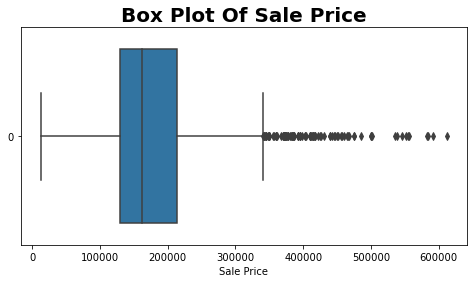

In [35]:
# visualise box plot of dependent variable
plt.figure(figsize=(8,4))
plt.title('Box Plot Of Sale Price', fontweight='semibold', fontsize=20)
plt.xlabel('Sale Price')
plt.ylabel('')
sns.boxplot(data=Xy['SalePrice'], orient='h');

**Observation:** The box plot of sale price shows that there appears to be many observations that are greater than 1.5 times the inter-quartile range but none that are smaller than 1.5 times the inter-quartile range. This means that there are many outliers to the right and the data is mainly concentrated to the left.

In [36]:
# generate descriptive statistics for dependent variable
Xy['SalePrice'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,2050.0,181484.609268,79275.121591,12789.0,129812.5,162500.0,214000.0,611657.0


In [37]:
# determine inter-quartile range and whisker values
iqr = Xy['SalePrice'].quantile(0.75) - Xy['SalePrice'].quantile(0.25)
left_whisker_min = Xy['SalePrice'].quantile(0.25) - 1.5 * iqr
right_whisker_max = Xy['SalePrice'].quantile(0.75) + 1.5 * iqr

print('Inter-Quartile Range:', iqr)
print('Left-Whisker Min:', left_whisker_min)
print('Right-Whisker Max:', right_whisker_max)

Inter-Quartile Range: 84187.5
Left-Whisker Min: 3531.25
Right-Whisker Max: 340281.25


In [38]:
# determine number and percentage of outliers
num_left_outliers = Xy[Xy['SalePrice'] < left_whisker_min].shape[0]
pct_left_outliers = np.round((num_left_outliers / Xy['SalePrice'].shape[0]), decimals=4)
num_right_outliers = Xy[Xy['SalePrice'] > right_whisker_max].shape[0]
pct_right_outliers = np.round((num_right_outliers / Xy['SalePrice'].shape[0]), decimals=4)

print('Number of Left Outliers:', num_left_outliers)
print('Percentage of Left Outliers:', pct_left_outliers)
print('Number of Right Outliers:', num_right_outliers)
print('Percentage of Right Outliers:', pct_right_outliers)

Number of Left Outliers: 0
Percentage of Left Outliers: 0.0
Number of Right Outliers: 94
Percentage of Right Outliers: 0.0459


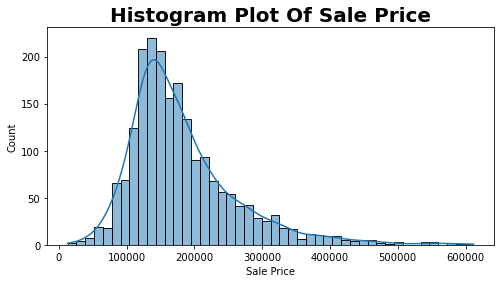

In [39]:
# visualise histogram plot of dependent variable
plt.figure(figsize=(8, 4))
plt.title('Histogram Plot Of Sale Price', fontweight='semibold', fontsize=20)
plt.xlabel('Sale Price')
plt.ylabel('Count')
sns.histplot(data=Xy['SalePrice'], kde=True);

**Observation:** The histogram plot of sale price shows that there is a positive or right skew. Most of the values are clustered around the left tail of the distribution and the right tail of the distribution is long. This means that there are several houses that got sold at extremely high prices.

### Univariate Visualisations of Numerical Independent Variables

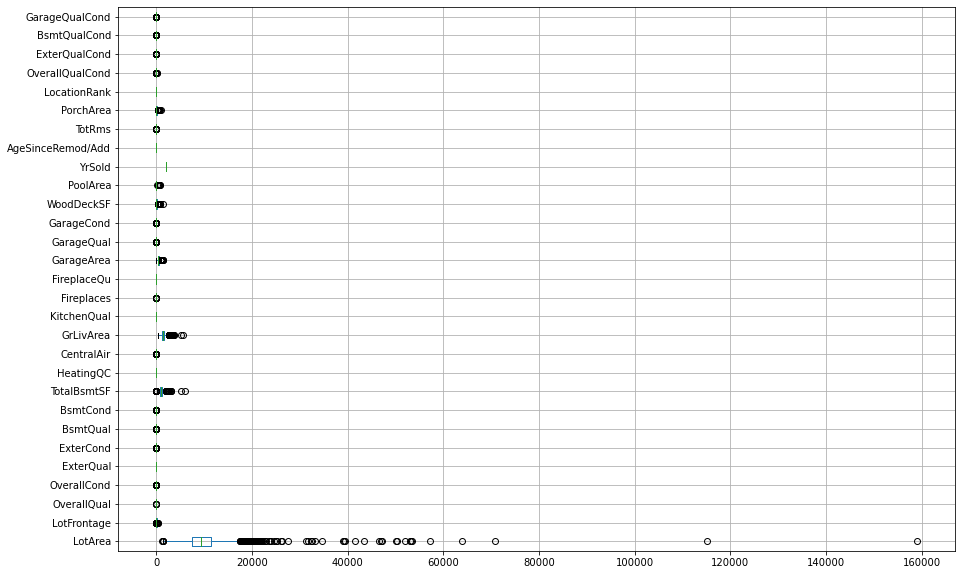

In [40]:
# visualise box plots of numerical independent variables
Xy.drop(columns='SalePrice').boxplot(figsize=(15, 10), vert=False);

**Observation:** It is not useful to see a combined box plot of all the features.

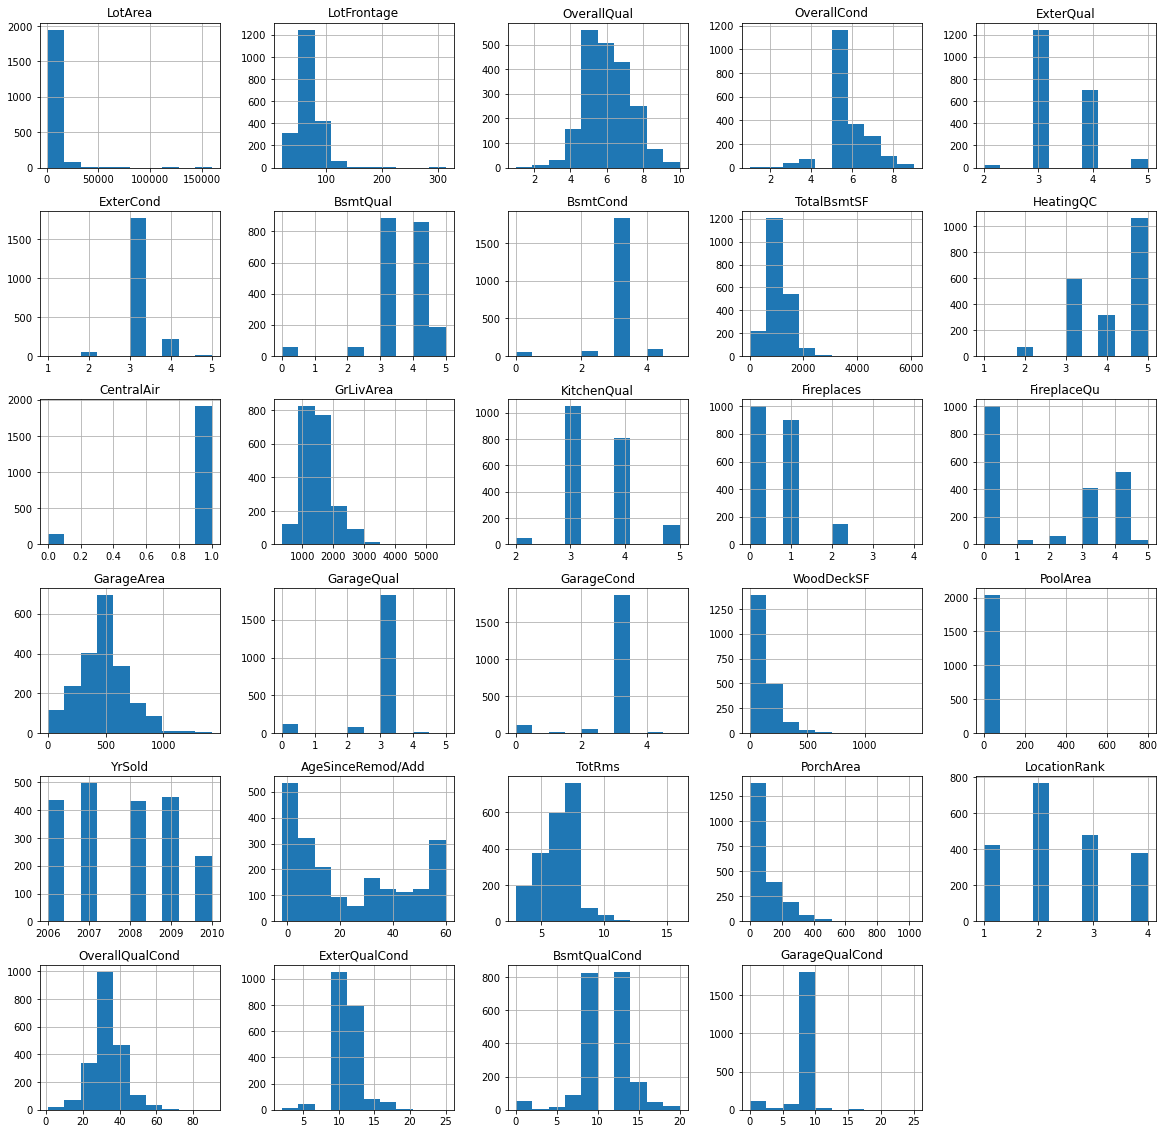

In [41]:
# visualise histogram plots of numerical independent variables
Xy.drop(columns='SalePrice').hist(figsize=(20, 20));

**Observation:**

Looking at the symmetry of the distributions:
- Features which are normally distributed: None
- Features with left skew: None
- Features with right skew: Lot Area, Lot Frontage, Total Basement Area, Above Ground Living Area, Garage Area, Wood Deck Area, Pool Area, Porch Area

Age Since Remodelling Or Addition has an interesting U-shaped distribution. Houses that are either very old or very young seem to fetch higher sale prices whereas houses in the middle fetch lower sale prices.

### Univariate Visualisations of Categorical Independent Variables

In [42]:
# generate the count and percentage for lot shape
pd.DataFrame({'LotShape': Xy['LotShape'].value_counts().index, 
              'Count': Xy['LotShape'].value_counts().values, 
              'Percentage': np.round(Xy['LotShape'].value_counts().values / Xy['LotShape'].count(), 
                                     decimals=4)})

,LotShape,Count,Percentage
0,Reg,1294,0.6312
1,IR1,692,0.3376
2,IR2,55,0.0268
3,IR3,9,0.0044


In [43]:
# generate the count and percentage for lot configuration
pd.DataFrame({'LotConfig': Xy['LotConfig'].value_counts().index, 
              'Count': Xy['LotConfig'].value_counts().values, 
              'Percentage': np.round(Xy['LotConfig'].value_counts().values / Xy['LotConfig'].count(), 
                                     decimals=4)})

,LotConfig,Count,Percentage
0,Inside,1502,0.7327
1,Corner,348,0.1698
2,CulDSac,131,0.0639
3,FR2,60,0.0293
4,FR3,9,0.0044


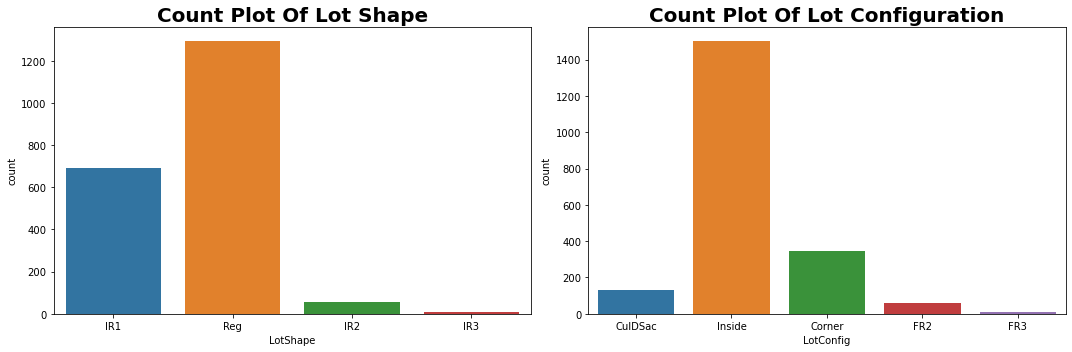

In [44]:
# visualise count plots of categorical independent variables
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1, 2, 1)
plt.title('Count Plot Of Lot Shape', fontweight='semibold', fontsize=20)
plt.xlabel('Lot Shape')
plt.ylabel('Count')
sns.countplot(data=Xy, x='LotShape')
fig.add_subplot(1, 2, 2)
plt.title('Count Plot Of Lot Configuration', fontweight='semibold', fontsize=20)
plt.xlabel('Lot Configuration')
plt.ylabel('Count')
sns.countplot(data=Xy, x='LotConfig')

plt.tight_layout();

**Observation:**<br>
Most houses have a Regular Lot Shape. Regular and Slightly Irregular account for 96.88% of lot shapes.<br>
Most houses have an Inside Lot Configuration. Inside and Corner account for 90.25% of lot configurations.

In [45]:
# generate the count and percentage for land contour
pd.DataFrame({'LandContour': Xy['LandContour'].value_counts().index, 
              'Count': Xy['LandContour'].value_counts().values, 
              'Percentage': np.round(Xy['LandContour'].value_counts().values / Xy['LandContour'].count(), 
                                     decimals=4)})

,LandContour,Count,Percentage
0,Lvl,1842,0.8985
1,HLS,85,0.0415
2,Bnk,80,0.0390
3,Low,43,0.0210


In [46]:
# generate the count and percentage for land slope
pd.DataFrame({'LandSlope': Xy['LandSlope'].value_counts().index, 
              'Count': Xy['LandSlope'].value_counts().values, 
              'Percentage': np.round(Xy['LandSlope'].value_counts().values / Xy['LandSlope'].count(), 
                                     decimals=4)})

,LandSlope,Count,Percentage
0,Gtl,1952,0.9522
1,Mod,88,0.0429
2,Sev,10,0.0049


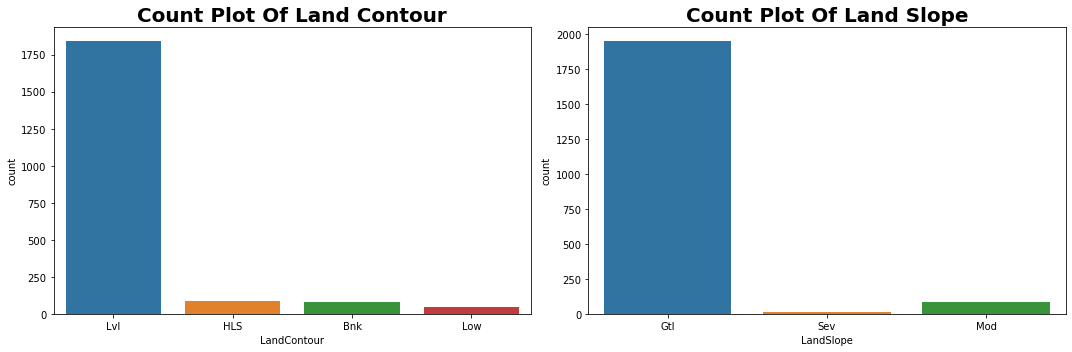

In [47]:
# visualise count plots of categorical independent variables
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1, 2, 1)
plt.title('Count Plot Of Land Contour', fontweight='semibold', fontsize=20)
plt.xlabel('Land Contour')
plt.ylabel('Count')
sns.countplot(data=Xy, x='LandContour')
fig.add_subplot(1, 2, 2)
plt.title('Count Plot Of Land Slope', fontweight='semibold', fontsize=20)
plt.xlabel('Lot Slope')
plt.ylabel('Count')
sns.countplot(data=Xy, x='LandSlope')

plt.tight_layout();

**Observation:**<br>
Most houses have a Level Land Contour. Level accounts for 89.85% of land contours.<br>
Most houses have a Gentle Land Slope. Gentle account for 95.22% of land slopes.

### Bivariate Visualisations of Numerical Independent Variables & Dependent Variable

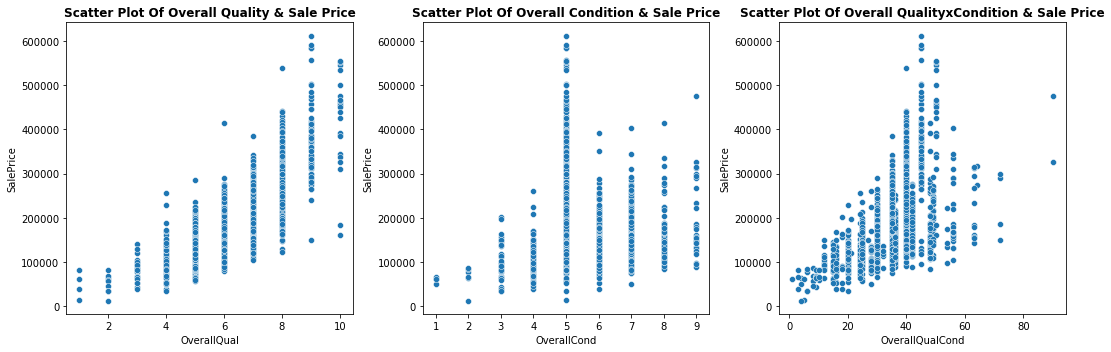

In [48]:
# visualise scatter plots of overall quality, overall condition, and overall qualityxcondition against sale price
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1, 3, 1)
plt.title('Scatter Plot Of Overall Quality & Sale Price', fontweight='semibold', fontsize=12)
sns.scatterplot(data=Xy, x='OverallQual', y='SalePrice')
fig.add_subplot(1, 3, 2)
plt.title('Scatter Plot Of Overall Condition & Sale Price', fontweight='semibold', fontsize=12)
sns.scatterplot(data=Xy, x='OverallCond', y='SalePrice')
fig.add_subplot(1, 3, 3)
plt.title('Scatter Plot Of Overall QualityxCondition & Sale Price', fontweight='semibold', fontsize=12)
sns.scatterplot(data=Xy, x='OverallQualCond', y='SalePrice')

plt.tight_layout();

In [49]:
# get corelations of overall quality, overall condition, and overall qualityxcondition against sale price
Xy.corr().loc['SalePrice', ['OverallQual', 'OverallCond', 'OverallQualCond']].to_frame().T

,OverallQual,OverallCond,OverallQualCond
SalePrice,0.800208,-0.096952,0.565209


**Observation:** Of the 3 Overall-type features, Overall Quality has the strongest correlation with Sale Price.

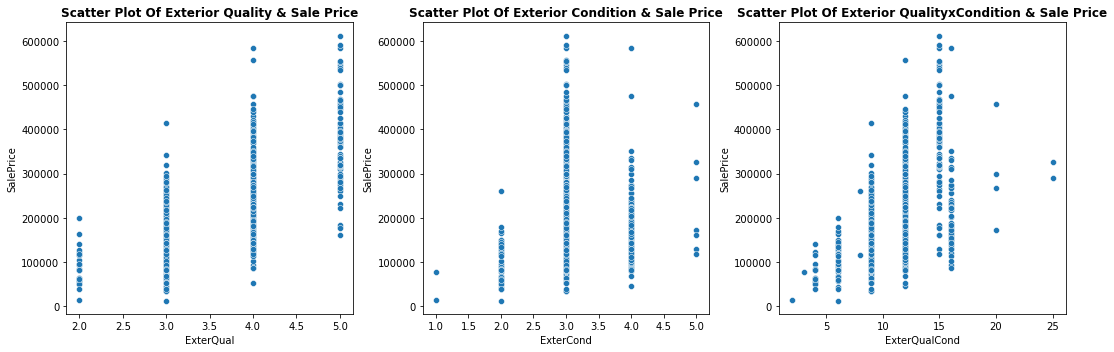

In [50]:
# visualise scatter plots of exterior quality, exterior condition, and exterior qualityxcondition against sale price
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1, 3, 1)
plt.title('Scatter Plot Of Exterior Quality & Sale Price', fontweight='semibold', fontsize=12)
sns.scatterplot(data=Xy, x='ExterQual', y='SalePrice')
fig.add_subplot(1, 3, 2)
plt.title('Scatter Plot Of Exterior Condition & Sale Price', fontweight='semibold', fontsize=12)
sns.scatterplot(data=Xy, x='ExterCond', y='SalePrice')
fig.add_subplot(1, 3, 3)
plt.title('Scatter Plot Of Exterior QualityxCondition & Sale Price', fontweight='semibold', fontsize=12)
sns.scatterplot(data=Xy, x='ExterQualCond', y='SalePrice')

plt.tight_layout();

In [51]:
# get correlations of exterior quality, exterior condition, and exterior qualityxcondition against sale price
Xy.corr().loc['SalePrice', ['ExterQual', 'ExterCond', 'ExterQualCond']].to_frame().T

,ExterQual,ExterCond,ExterQualCond
SalePrice,0.712124,0.036377,0.596596


**Observation:** Of the 3 Exterior-type features, Exterior Quality has the strongest correlation with Sale Price.

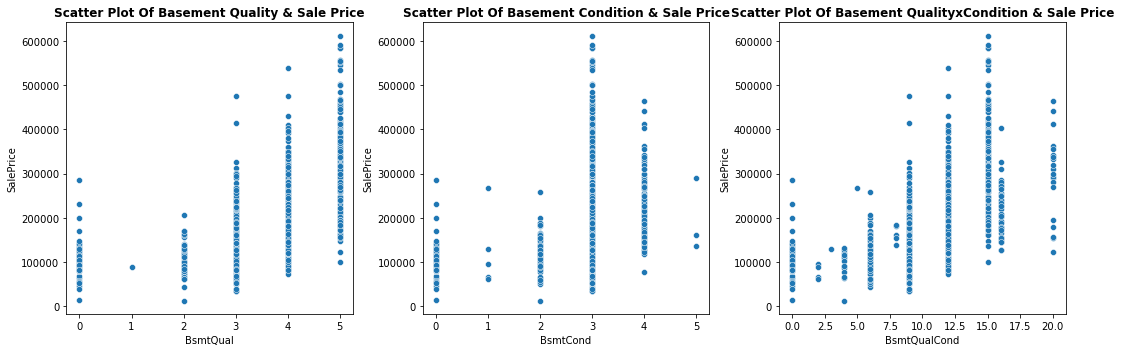

In [52]:
# visualise scatter plots of basement quality, basement condition, and basement qualityxcondition against sale price
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1, 3, 1)
plt.title('Scatter Plot Of Basement Quality & Sale Price', fontweight='semibold', fontsize=12)
sns.scatterplot(data=Xy, x='BsmtQual', y='SalePrice')
fig.add_subplot(1, 3, 2)
plt.title('Scatter Plot Of Basement Condition & Sale Price', fontweight='semibold', fontsize=12)
sns.scatterplot(data=Xy, x='BsmtCond', y='SalePrice')
fig.add_subplot(1, 3, 3)
plt.title('Scatter Plot Of Basement QualityxCondition & Sale Price', fontweight='semibold', fontsize=12)
sns.scatterplot(data=Xy, x='BsmtQualCond', y='SalePrice')

plt.tight_layout();

In [53]:
# get correlations of basement quality, basement condition, and basement qualityxcondition against sale price
Xy.corr().loc['SalePrice', ['BsmtQual', 'BsmtCond', 'BsmtQualCond']].to_frame().T

,BsmtQual,BsmtCond,BsmtQualCond
SalePrice,0.612364,0.225108,0.600627


**Observation:** Of the 3 Basement-type features, Basement Quality has the strongest correlation with Sale Price.

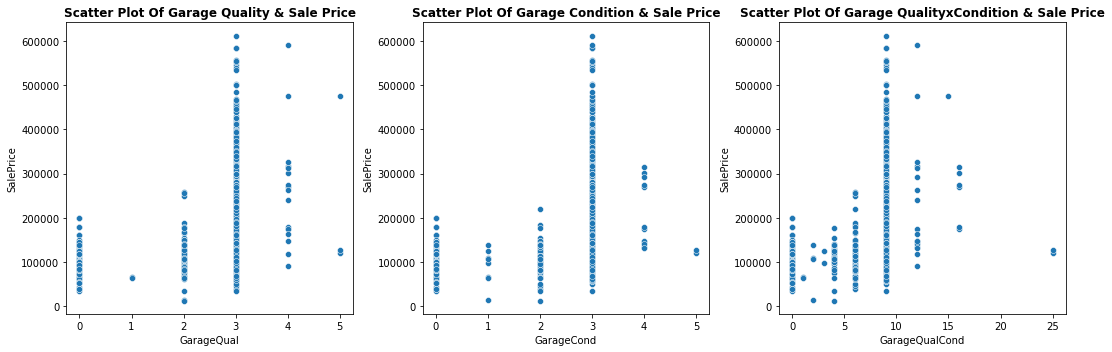

In [54]:
# visualise scatter plots of garage quality, garage condition, and garage qualityxcondition against sale price
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1, 3, 1)
plt.title('Scatter Plot Of Garage Quality & Sale Price', fontweight='semibold', fontsize=12)
sns.scatterplot(data=Xy, x='GarageQual', y='SalePrice')
fig.add_subplot(1, 3, 2)
plt.title('Scatter Plot Of Garage Condition & Sale Price', fontweight='semibold', fontsize=12)
sns.scatterplot(data=Xy, x='GarageCond', y='SalePrice')
fig.add_subplot(1, 3, 3)
plt.title('Scatter Plot Of Garage QualityxCondition & Sale Price', fontweight='semibold', fontsize=12)
sns.scatterplot(data=Xy, x='GarageQualCond', y='SalePrice')

plt.tight_layout();

In [55]:
# get correlations of garage quality, garage condition, and garage qualityxcondition against sale price
Xy.corr().loc['SalePrice', ['GarageQual', 'GarageCond', 'GarageQualCond']].to_frame().T

,GarageQual,GarageCond,GarageQualCond
SalePrice,0.285614,0.265291,0.295549


**Observation:** Of the 3 Garage-type features, Garage QualityxCondition has the strongest correlation with Sale Price.

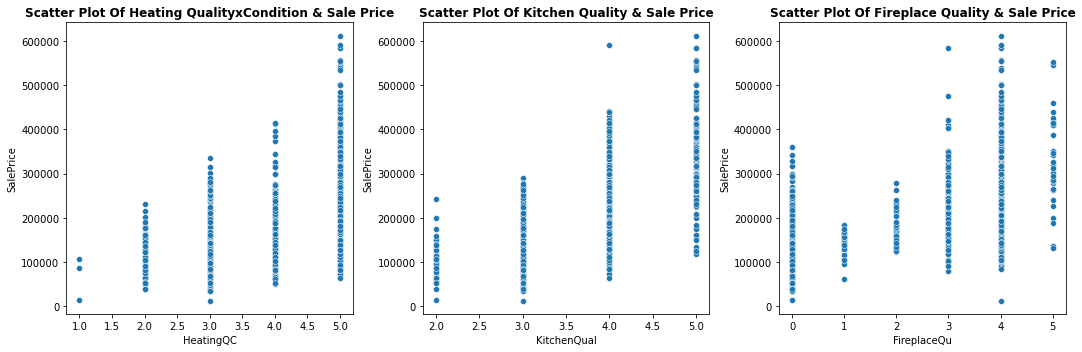

In [56]:
# visualise scatter plots of heating qualityxcondition, kitchen quality, and fireplace quality against sale price
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1, 3, 1)
plt.title('Scatter Plot Of Heating QualityxCondition & Sale Price', fontweight='semibold', fontsize=12)
sns.scatterplot(data=Xy, x='HeatingQC', y='SalePrice')
fig.add_subplot(1, 3, 2)
plt.title('Scatter Plot Of Kitchen Quality & Sale Price', fontweight='semibold', fontsize=12)
sns.scatterplot(data=Xy, x='KitchenQual', y='SalePrice')
fig.add_subplot(1, 3, 3)
plt.title('Scatter Plot Of Fireplace Quality & Sale Price', fontweight='semibold', fontsize=12)
sns.scatterplot(data=Xy, x='FireplaceQu', y='SalePrice')

plt.tight_layout();

In [57]:
# get correlations of heating qualityxcondition, kitchen quality, and fireplace quality against sale price
Xy.corr().loc['SalePrice', ['HeatingQC', 'KitchenQual', 'FireplaceQu']].to_frame().T

,HeatingQC,KitchenQual,FireplaceQu
SalePrice,0.45862,0.692587,0.538886


**Observation:** Heating QualityxCondition, Kitchen Quality, and Fireplace Quality have moderate correlations with Sale Price.

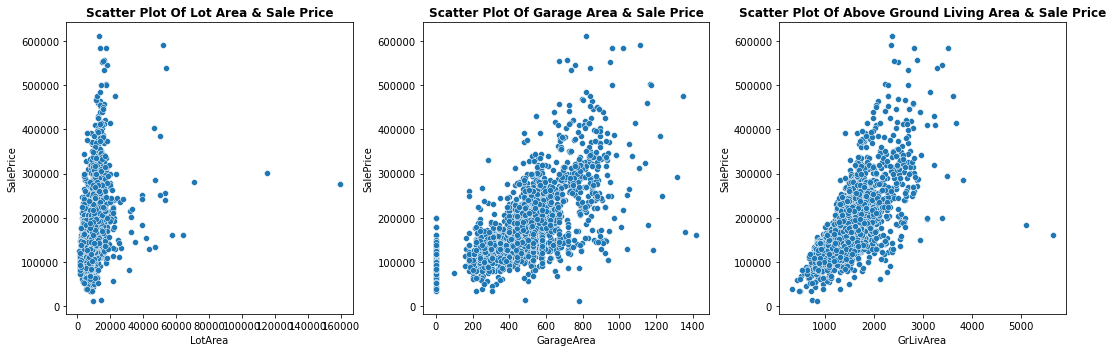

In [58]:
# visualise scatter plots of lot area, garage area, and above ground living area against sale price
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1, 3, 1)
plt.title('Scatter Plot Of Lot Area & Sale Price', fontweight='semibold', fontsize=12)
sns.scatterplot(data=Xy, x='LotArea', y='SalePrice')
fig.add_subplot(1, 3, 2)
plt.title('Scatter Plot Of Garage Area & Sale Price', fontweight='semibold', fontsize=12)
sns.scatterplot(data=Xy, x='GarageArea', y='SalePrice')
fig.add_subplot(1, 3, 3)
plt.title('Scatter Plot Of Above Ground Living Area & Sale Price', fontweight='semibold', fontsize=12)
sns.scatterplot(data=Xy, x='GrLivArea', y='SalePrice')

plt.tight_layout();

In [59]:
# get correlations of lot area, garage area, and above ground living area against sale price
Xy.corr().loc['SalePrice', ['LotArea', 'GarageArea', 'GrLivArea']].to_frame().T

,LotArea,GarageArea,GrLivArea
SalePrice,0.29655,0.65027,0.697261


**Observation:** Lot Area has a poor correlation with Sale Price. Garage Area and Above Ground Living Area have moderate correlations with Sale Price.

In [60]:
# isolating possible outliers
Xy.loc[Xy['LotArea'] > 100000]

,LotArea,LotFrontage,LotShape,LotConfig,LandContour,LandSlope,Neighborhood,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,PoolArea,YrSold,SalePrice,AgeSinceRemod/Add,TotRms,PorchArea,LocationRank,OverallQualCond,ExterQualCond,BsmtQualCond,GarageQualCond
471,159000,69,IR2,CulDSac,Low,Sev,ClearCr,6,7,4,3,4,3,1444,4,1,2144,4,2,3,389,3,3,0,0,2007,277000,1,8,98,1,42,12,12,9
694,115149,69,IR2,CulDSac,Low,Sev,ClearCr,7,5,3,3,4,3,1643,3,1,1824,4,2,3,739,3,3,380,0,2007,302000,5,6,48,1,35,9,12,9


In [61]:
# isolating possible outliers
Xy.loc[Xy['GrLivArea'] > 4000]

,LotArea,LotFrontage,LotShape,LotConfig,LandContour,LandSlope,Neighborhood,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,PoolArea,YrSold,SalePrice,AgeSinceRemod/Add,TotRms,PorchArea,LocationRank,OverallQualCond,ExterQualCond,BsmtQualCond,GarageQualCond
960,63887,313,IR3,Corner,Bnk,Gtl,Edwards,10,5,5,3,5,3,6110,5,1,5642,5,3,4,1418,3,3,214,480,2008,160000,0,9,292,1,50,15,15,9
1884,39290,128,IR1,Inside,Bnk,Gtl,Edwards,10,5,5,3,5,3,5095,5,1,5095,5,2,4,1154,3,3,546,0,2007,183850,-2,8,484,1,50,15,15,9


**Observation:** Lot Area and Above Ground Living Areas may have possible outliers.

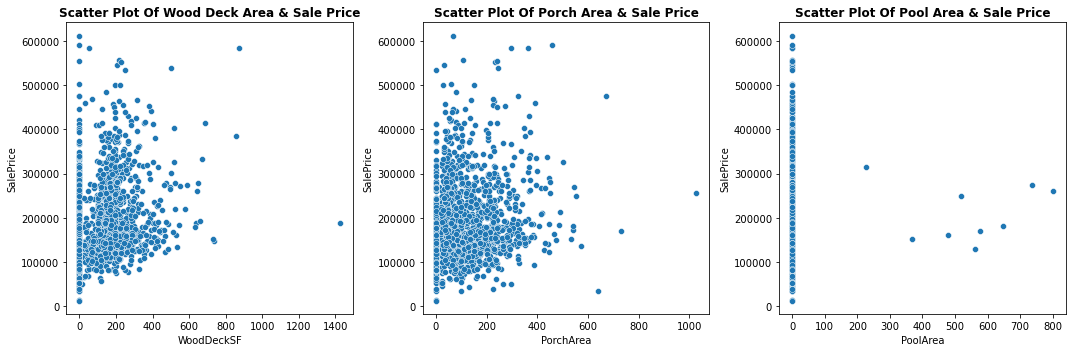

In [62]:
# visualise scatter plots of wood deck area, porch area, and pool area against sale price
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1, 3, 1)
plt.title('Scatter Plot Of Wood Deck Area & Sale Price', fontweight='semibold', fontsize=12)
sns.scatterplot(data=Xy, x='WoodDeckSF', y='SalePrice')
fig.add_subplot(1, 3, 2)
plt.title('Scatter Plot Of Porch Area & Sale Price', fontweight='semibold', fontsize=12)
sns.scatterplot(data=Xy, x='PorchArea', y='SalePrice')
fig.add_subplot(1, 3, 3)
plt.title('Scatter Plot Of Pool Area & Sale Price', fontweight='semibold', fontsize=12)
sns.scatterplot(data=Xy, x='PoolArea', y='SalePrice')

plt.tight_layout();

In [63]:
# get correlations of wood deck area, porch area, and pool area against sale price
Xy.corr().loc['SalePrice', ['WoodDeckSF', 'PorchArea', 'PoolArea']].to_frame().T

,WoodDeckSF,PorchArea,PoolArea
SalePrice,0.32665,0.219273,0.023095


**Observation:** Wood Deck Area and Porch Area have poor correlations with Sale Price. Pool Area has little to no correlation with Sale Price.

In [64]:
# isolating possible outliers
Xy.loc[Xy['WoodDeckSF'] > 1200]

,LotArea,LotFrontage,LotShape,LotConfig,LandContour,LandSlope,Neighborhood,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,PoolArea,YrSold,SalePrice,AgeSinceRemod/Add,TotRms,PorchArea,LocationRank,OverallQualCond,ExterQualCond,BsmtQualCond,GarageQualCond
966,15957,69,IR1,Corner,Low,Mod,Mitchel,6,6,3,3,4,3,1244,3,1,1356,3,1,3,528,3,3,1424,0,2007,188000,30,8,0,2,36,9,12,9


In [65]:
# isolating possible outliers
Xy.loc[Xy['PorchArea'] > 1000]

,LotArea,LotFrontage,LotShape,LotConfig,LandContour,LandSlope,Neighborhood,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,PoolArea,YrSold,SalePrice,AgeSinceRemod/Add,TotRms,PorchArea,LocationRank,OverallQualCond,ExterQualCond,BsmtQualCond,GarageQualCond
974,10440,60,Reg,Corner,Lvl,Gtl,OldTown,6,7,4,4,4,3,1510,5,1,2792,3,2,3,520,2,3,0,0,2008,256000,58,8,1027,2,42,16,12,6


**Observation:** Wood Deck Area and Porch Area may have possible outliers.

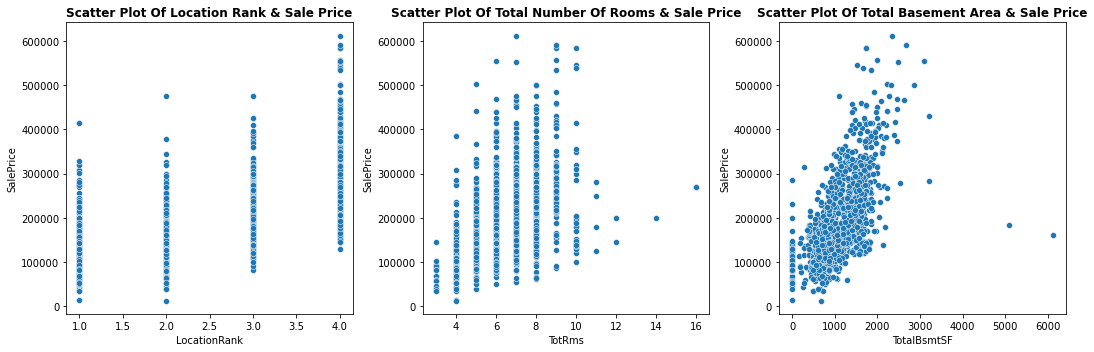

In [66]:
# visualise scatter plots of location rank, total number of rooms, and total basement area against sale price
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1, 3, 1)
plt.title('Scatter Plot Of Location Rank & Sale Price', fontweight='semibold', fontsize=12)
sns.scatterplot(data=Xy, x='LocationRank', y='SalePrice')
fig.add_subplot(1, 3, 2)
plt.title('Scatter Plot Of Total Number Of Rooms & Sale Price', fontweight='semibold', fontsize=12)
sns.scatterplot(data=Xy, x='TotRms', y='SalePrice')
fig.add_subplot(1, 3, 3)
plt.title('Scatter Plot Of Total Basement Area & Sale Price', fontweight='semibold', fontsize=12)
sns.scatterplot(data=Xy, x='TotalBsmtSF', y='SalePrice')

plt.tight_layout();

In [67]:
# get correlations of location rank, total number of rooms, and total basement area against sale price
Xy.corr().loc['SalePrice', ['LocationRank', 'TotRms', 'TotalBsmtSF']].to_frame().T

,LocationRank,TotRms,TotalBsmtSF
SalePrice,0.642399,0.458368,0.629273


**Observation:** Location Rank, Total Rooms, and Total Basement Area have moderate correlations with Sale Price.

In [68]:
# isolating possible outliers
Xy.loc[Xy['TotRms'] > 15]

,LotArea,LotFrontage,LotShape,LotConfig,LandContour,LandSlope,Neighborhood,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,PoolArea,YrSold,SalePrice,AgeSinceRemod/Add,TotRms,PorchArea,LocationRank,OverallQualCond,ExterQualCond,BsmtQualCond,GarageQualCond
1566,11855,69,Reg,Inside,Lvl,Gtl,SawyerW,7,5,3,3,5,3,1168,5,1,2787,3,2,3,820,3,3,312,0,2009,269500,9,16,0,3,35,9,15,9
1605,7939,69,Reg,Inside,Lvl,Gtl,SawyerW,7,5,3,3,5,3,1168,5,1,2787,3,2,3,820,3,3,312,0,2009,269500,9,16,0,3,35,9,15,9


In [69]:
# isolating possible outliers
Xy.loc[Xy['TotalBsmtSF'] > 5000]

,LotArea,LotFrontage,LotShape,LotConfig,LandContour,LandSlope,Neighborhood,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,PoolArea,YrSold,SalePrice,AgeSinceRemod/Add,TotRms,PorchArea,LocationRank,OverallQualCond,ExterQualCond,BsmtQualCond,GarageQualCond
960,63887,313,IR3,Corner,Bnk,Gtl,Edwards,10,5,5,3,5,3,6110,5,1,5642,5,3,4,1418,3,3,214,480,2008,160000,0,9,292,1,50,15,15,9
1884,39290,128,IR1,Inside,Bnk,Gtl,Edwards,10,5,5,3,5,3,5095,5,1,5095,5,2,4,1154,3,3,546,0,2007,183850,-2,8,484,1,50,15,15,9


**Observation:** Total Rooms and Total Basement Area may have possible outliers.

### Bivariate Visualisations of Categorical Independent Variables & Dependent Variable

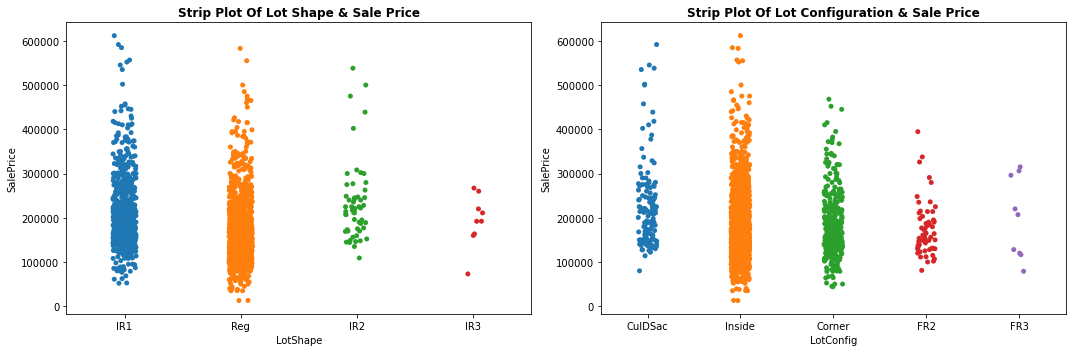

In [70]:
# visualise strip plots of lot shape and lot configuration against sale price
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1, 2, 1)
plt.title('Strip Plot Of Lot Shape & Sale Price', fontweight='semibold', fontsize=12)
sns.stripplot(data=Xy, x='LotShape', y='SalePrice', jitter=1)
fig.add_subplot(1, 2, 2)
plt.title('Strip Plot Of Lot Configuration & Sale Price', fontweight='semibold', fontsize=12)
sns.stripplot(data=Xy, x='LotConfig', y='SalePrice', jitter=1)

plt.tight_layout();

**Observation:**<br>
Houses with Irregular lot shape have sold for a lower price than houses with Regular, Slightly Irregular, and Moderately Irregular lot shapes.<br>
Inside houses have sold for the highest price. This is followed by Cul-De-Sac houses, Corner houses, houses with 2 Frontage, and houses with 3 Frontage.

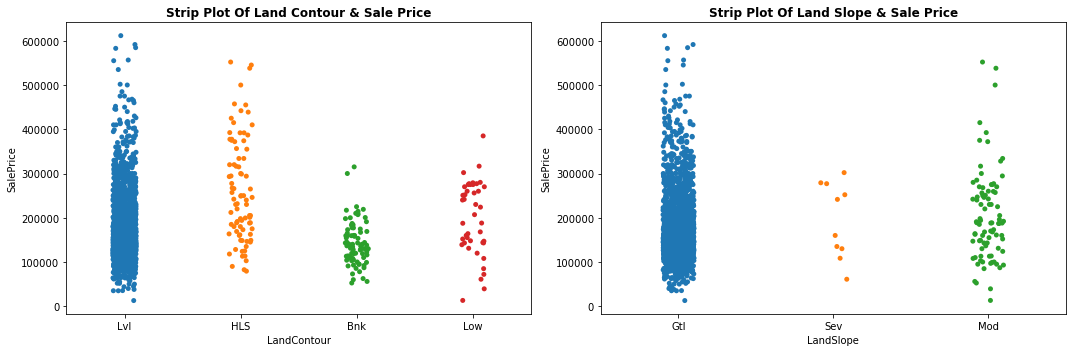

In [71]:
# visualise strip plots of land contour and land slope against sale price
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1, 2, 1)
plt.title('Strip Plot Of Land Contour & Sale Price', fontweight='semibold', fontsize=12)
sns.stripplot(data=Xy, x='LandContour', y='SalePrice', jitter=1)
fig.add_subplot(1, 2, 2)
plt.title('Strip Plot Of Land Slope & Sale Price', fontweight='semibold', fontsize=12)
sns.stripplot(data=Xy, x='LandSlope', y='SalePrice', jitter=1)

plt.tight_layout();

**Observation:**<br>
Banked and Depressed houses do not seem to be able to fetch higher sale prices than Level and Hillside houses.<br>
Severe-sloping houses do not appear to be able to command higher sale prices than Gentle- and Moderate-sloping houses.

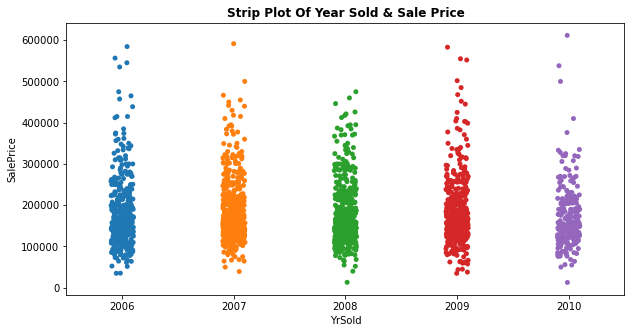

In [72]:
# visualise strip plots of year sold against sale price
plt.figure(figsize=(10,5))
plt.title('Strip Plot Of Year Sold & Sale Price', fontweight='semibold', fontsize=12)
sns.stripplot(data=Xy, x='YrSold', y='SalePrice', jitter=1);

**Observation:** There seems to be a roughly equal distribution of sale prices across the years sold.

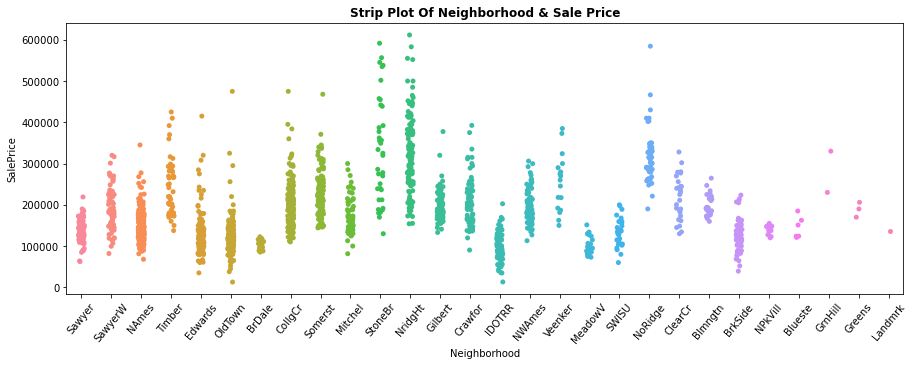

In [73]:
# visualise strip plots of neighborhood against sale price
plt.figure(figsize=(15,5))
plt.title('Strip Plot Of Neighborhood & Sale Price', fontweight='semibold', fontsize=12)
plt.tick_params(axis='x', labelrotation=50)
sns.stripplot(data=Xy, x='Neighborhood', y='SalePrice', jitter=1);

**Observation:**<br>
The neighbourhoods which contain houses that have fetched higher sale prices are Stone Brook, Northridge Heights, and Northridge.<br>
The neighbourhoods which contain houses that have fetched lower sale prices are Edwards, Old Town, and Iowa DOT and Rail Road.

### Correlation Heatmaps

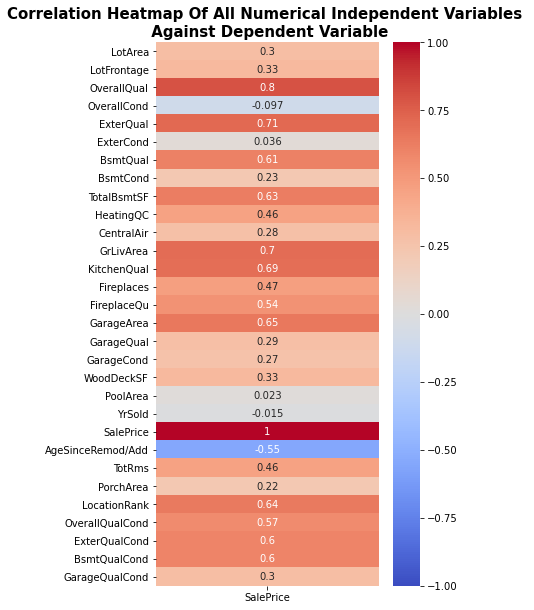

In [74]:
# visualise correlation heatmap of all numerical independent variables against dependent variable
# to check for numerical independent variables that are strongly or weakly correlated with the dependent variable
plt.figure(figsize=(5, 10))
plt.title('Correlation Heatmap Of All Numerical Independent Variables \n Against Dependent Variable', 
          fontweight='semibold', fontsize=15)
sns.heatmap(Xy.corr()[['SalePrice']], annot=True, cmap='coolwarm', vmin=-1, vmax=1);

**Observation:**<br>
Features with fairly strong correlation with Sale Price are Overall Quality, Exterior Quality, and Above Ground Living Area.<br>
Features with fairly weak correlation with Sale Price are Overall Condition, Pool Area, and Year Sold.<br>
Most features have a positive correlation with Sale Price except for Age Since Remodelling Or Addition which has a significant negative correlation.

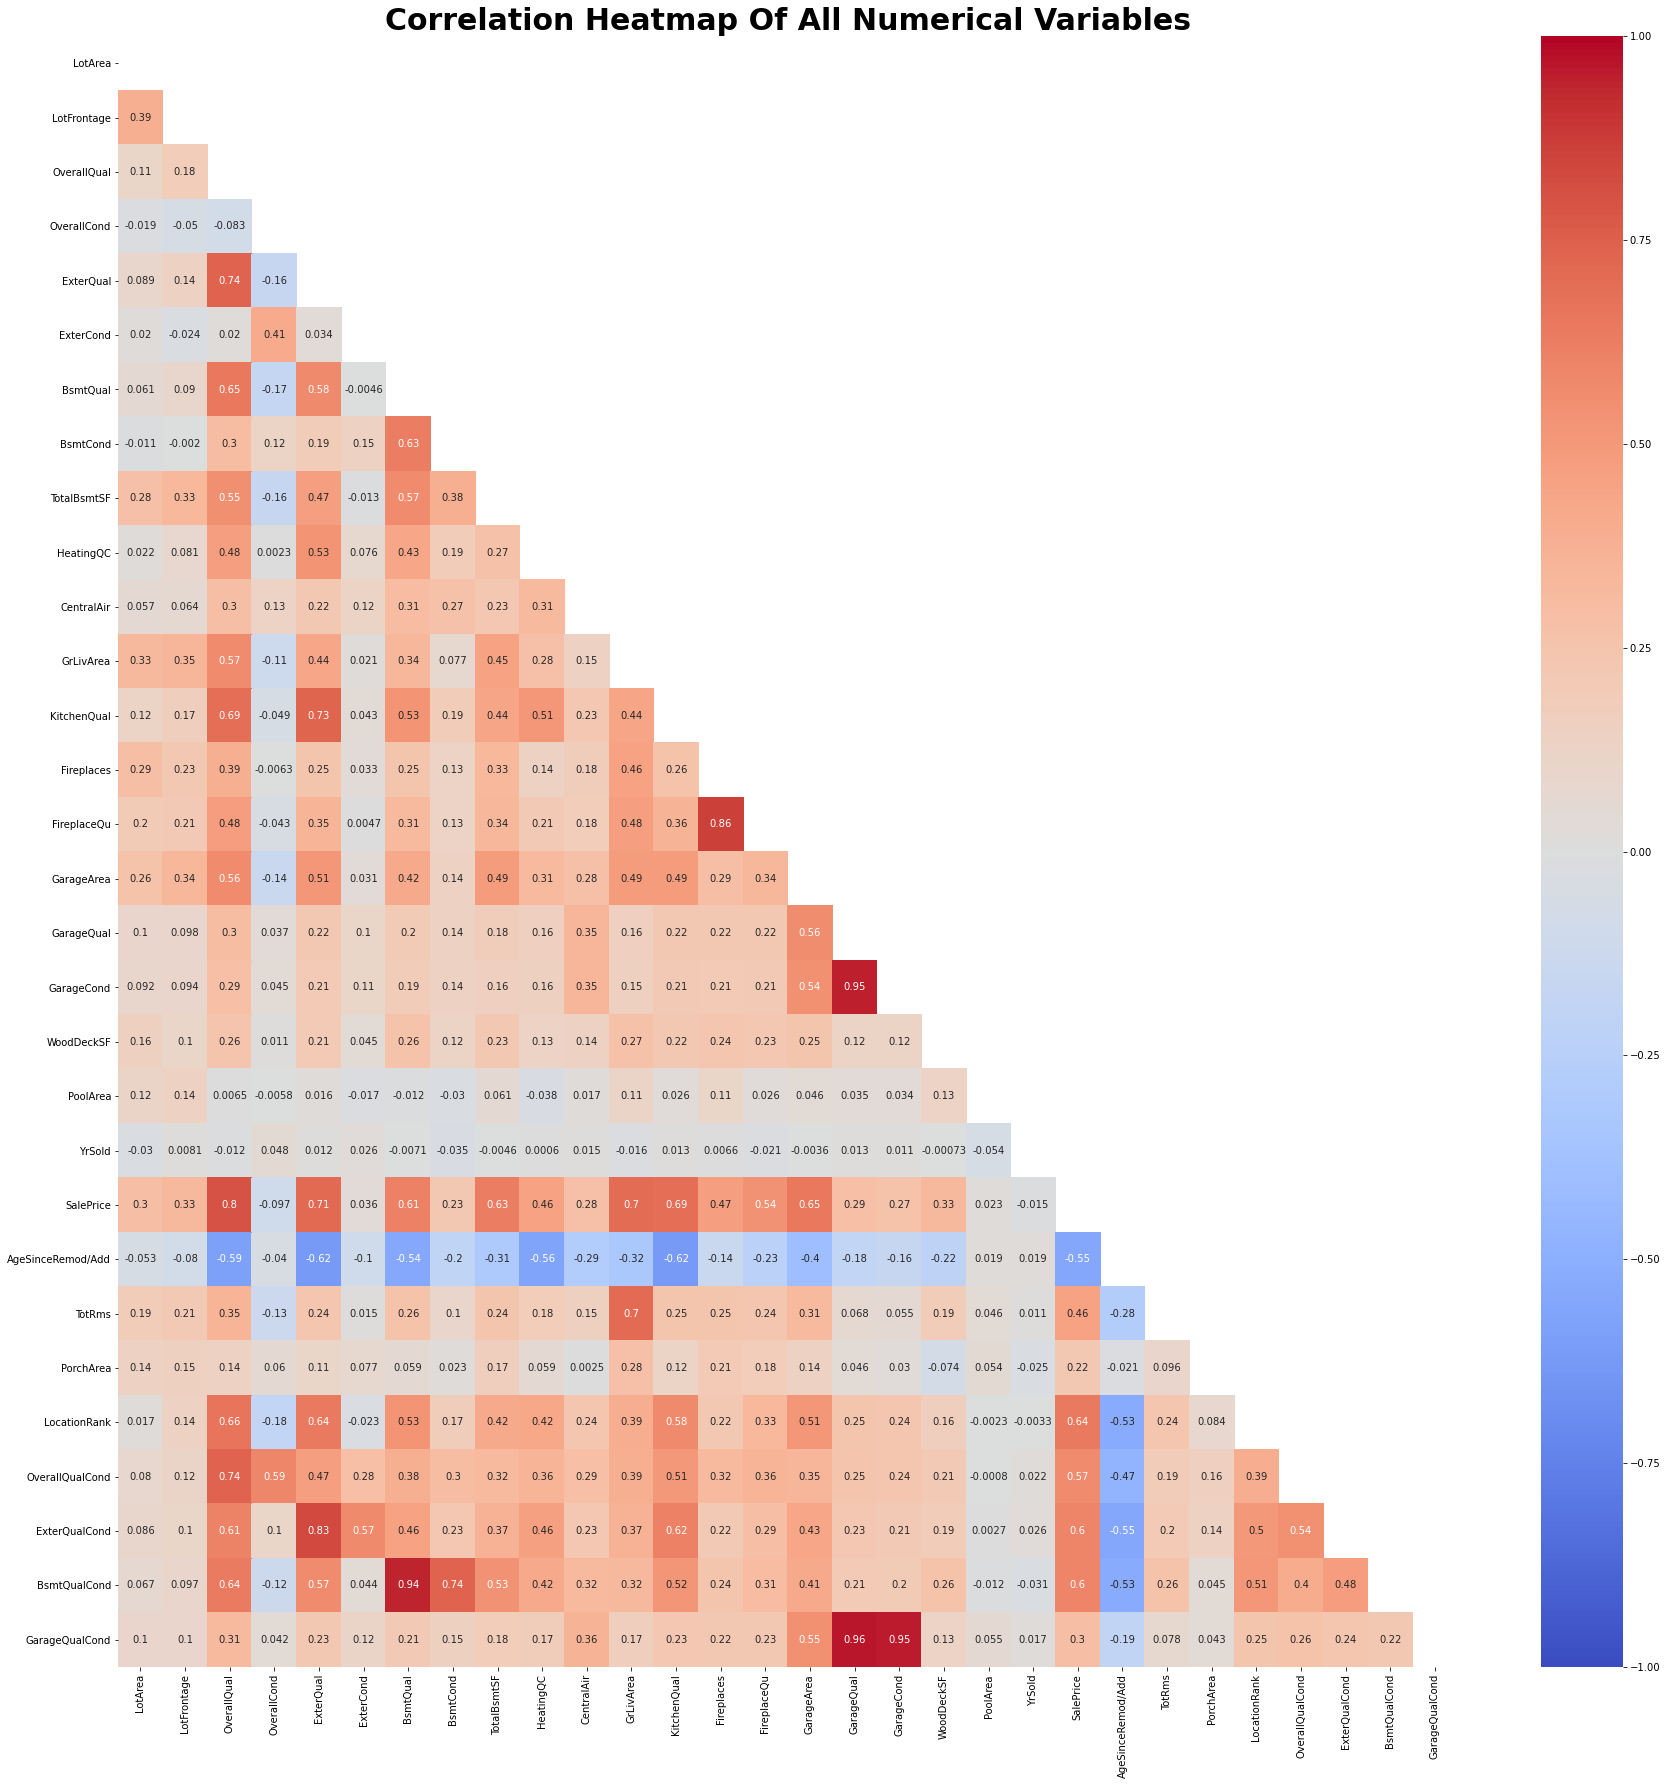

In [75]:
# visualise correlation heatmap of all numerical variables
mask = np.zeros_like(Xy.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30, 30))
plt.title('Correlation Heatmap Of All Numerical Variables', 
          fontweight='semibold', fontsize=30)
sns.heatmap(Xy.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=mask);

**Observation:** There are more positive correlations than negative correlations between variables. There exists pockets of squares that reveal a strong positive correlation or a strong negative correlation between variables.

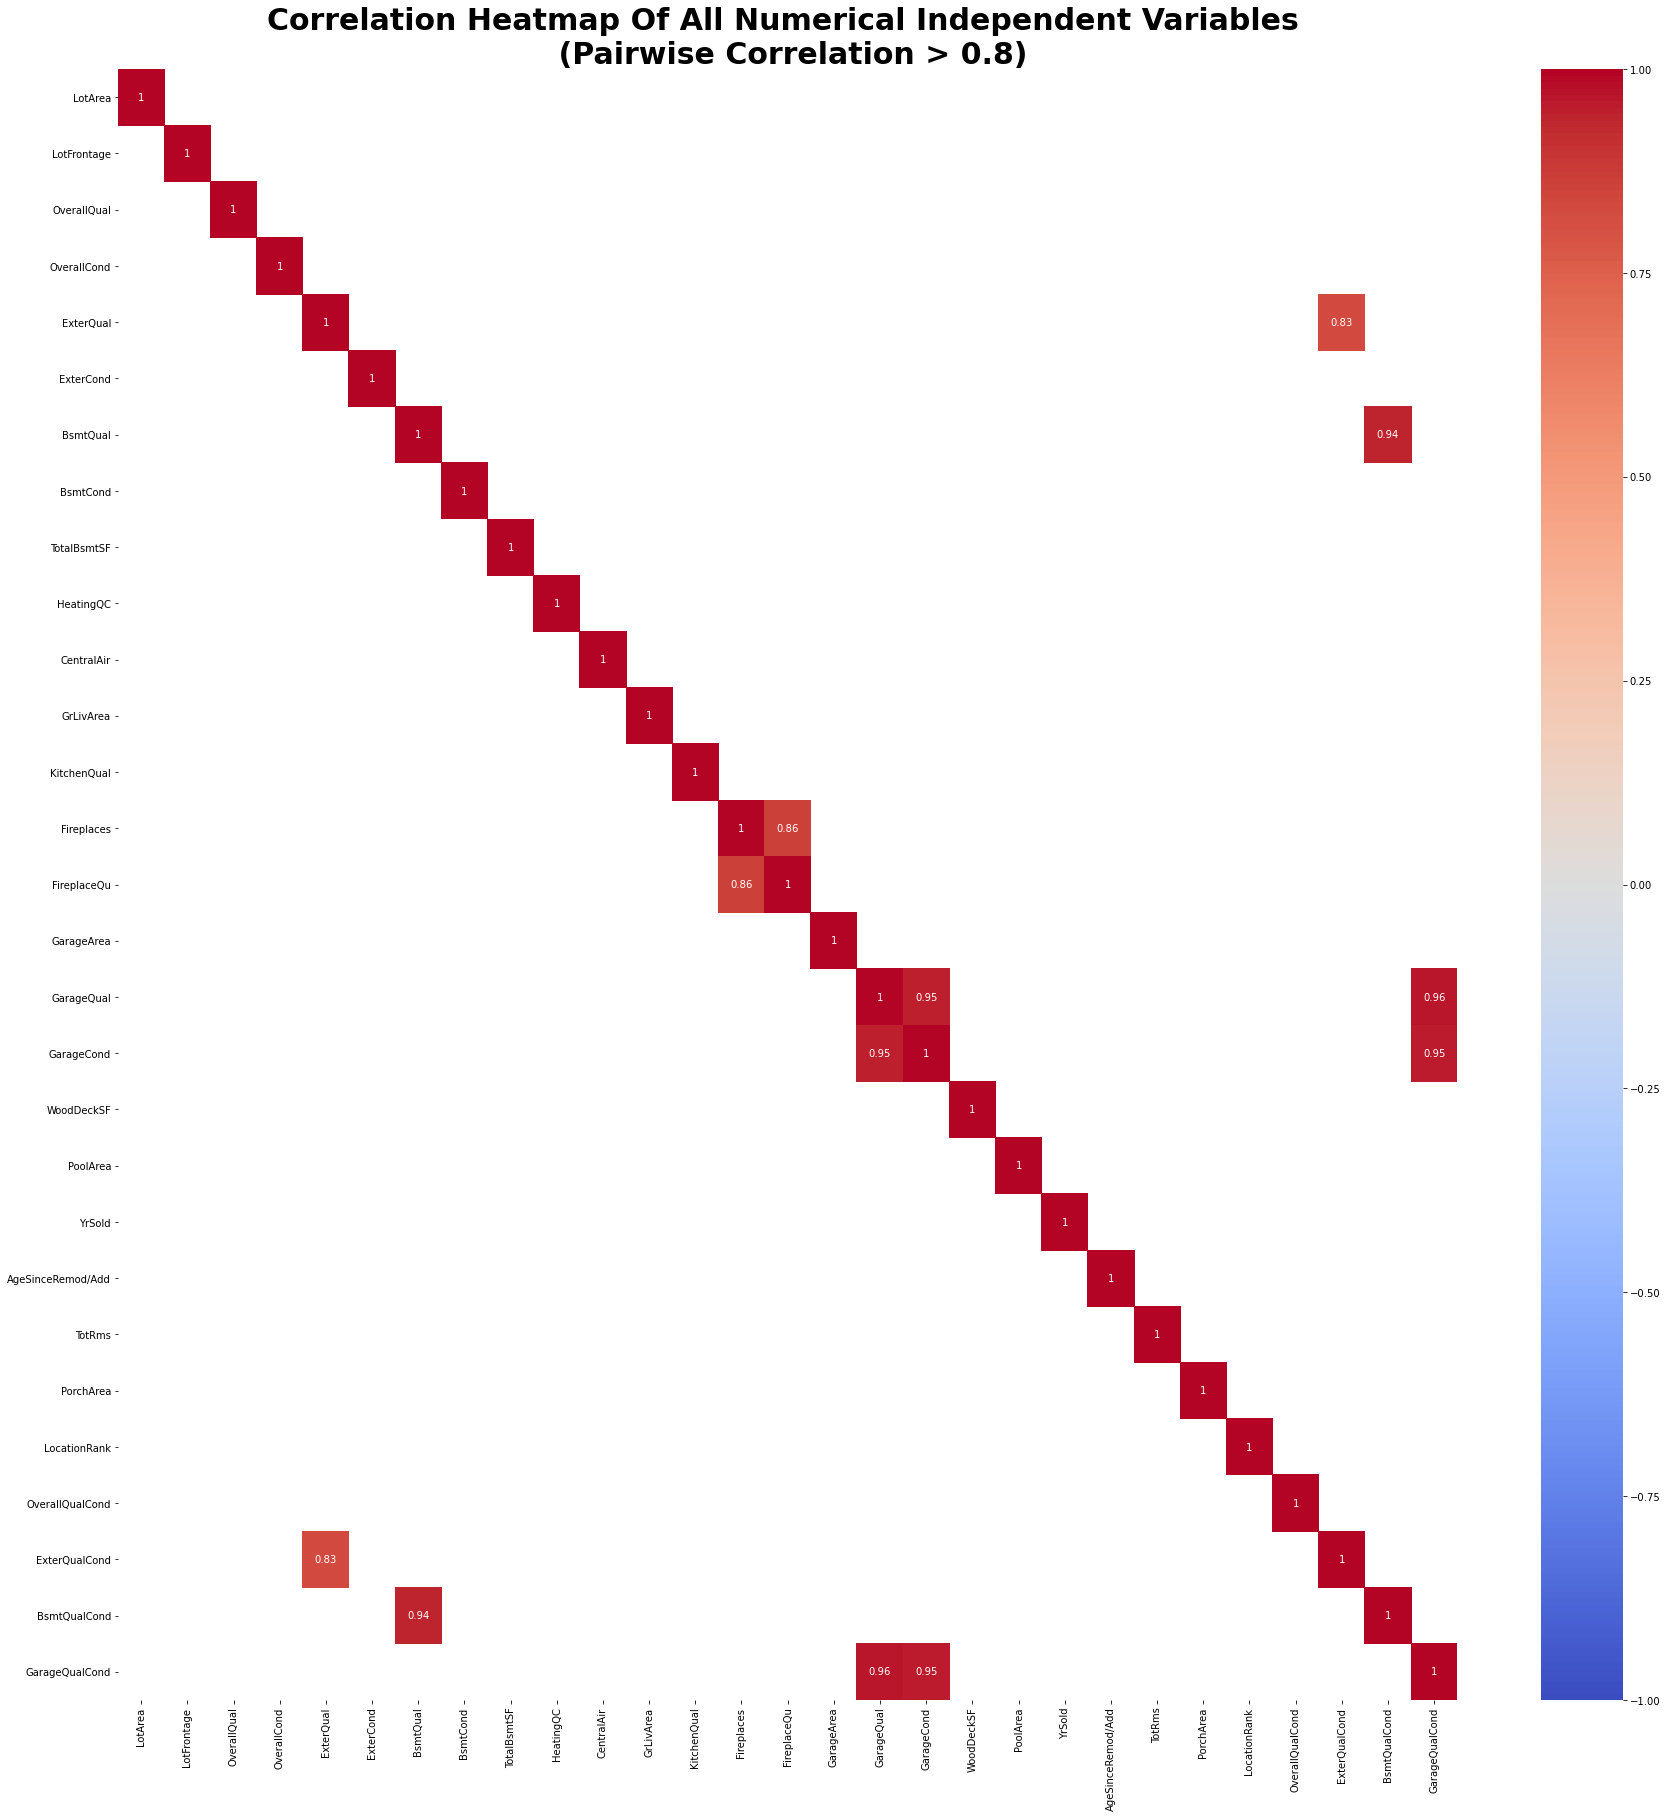

In [76]:
# visualise correlation heatmap of all numerical independent variables
# to check for multicollinearity between numerical independent variables
plt.figure(figsize=(30, 30))
plt.title('Correlation Heatmap Of All Numerical Independent Variables \n \
(Pairwise Correlation > 0.8)', fontweight='semibold', fontsize=30)
sns.heatmap(Xy.drop(columns='SalePrice').corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            mask=(np.abs(Xy.drop(columns='SalePrice').corr()) < 0.8));

**Observation:**

The 4 QualityxCondition interaction features can be seen to have a high positive correlation with their 4 respective Quality features.

- Overall QualityxCondition and Overall Quality have a positive correlation of 0.74.
- Exterior QualityxCondition and Exterior Quality have a positive correlation of 0.83.
- Basement QualityxCondition and Basement Quality have a positive correlation of 0.94.
- Garage QualityxCondition and Garage Quality have a positive correlation of 0.96.

The 4 QualityxCondition interaction features also have a decent positive correlation with their 4 respective Condition features.

- Overall QualityxCondition and Overall Condition have a positive correlation of 0.59.
- Exterior QualityxCondition and Exterior Condition have a positive correlation of 0.57.
- Basement QualityxCondition and Basement Condition have a positive correlation of 0.74.
- Garage QualityxCondition and Garage Condition have a positive correlation of 0.95.

To reduce multicollinearity, only the QualityxCondition interaction features are kept, and their respective component features were omitted from the model.

Although Fireplaces and Fireplace Quality have strong multicollinearity, they are independent in reality as having more fireplaces may not equate to having higher quality fireplaces and so they will be retained in the model.

## Pre-Processing & Modelling

### Features-Target Definition

In [77]:
# create a copy of the dataset with just the features needed for modelling
X = Xy[['LotArea', 'LotFrontage', 'LotShape', 'LotConfig', 'LandContour', 'LandSlope', 'LocationRank', 
        'OverallQualCond', 'ExterQualCond', 'AgeSinceRemod/Add', 'BsmtQualCond', 'TotalBsmtSF', 'HeatingQC', 
        'CentralAir', 'GrLivArea', 'TotRms', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageArea', 
        'GarageQualCond', 'WoodDeckSF', 'PorchArea', 'PoolArea', 'YrSold']].copy()

# create a copy of the dataset with just the targets needed for modelling
y = Xy['SalePrice'].copy()

### Dummification

In [78]:
# one-hot encode categorical columns
X = pd.get_dummies(X, columns=['LotShape', 'LotConfig', 'LandContour', 'LandSlope', 'YrSold'], drop_first=True)

### Train Test Split

In [79]:
# perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Feature Scaling

In [80]:
# perform feature scaling
scaler = StandardScaler()
Z_train = scaler.fit_transform(X_train)
Z_test = scaler.transform(X_test)

### Model Evaluation & Selection

In [81]:
# instantiate linear model
linear = LinearRegression()

# instantiate ridgecv model
ridgecv = RidgeCV(alphas=np.logspace(0, 5, 200), cv=5)

# instantiate lassocv model
lassocv = LassoCV(n_alphas=200, cv=5)

In [82]:
# get scores from performing cross validation on training data with linear model
cv_r2 = cross_val_score(linear, Z_train, y_train, scoring='r2', cv=5).mean()
cv_mse = cross_val_score(linear, Z_train, y_train, scoring='neg_mean_squared_error', cv=5).mean() * -1

print('Linear Regression Cross-Validated R-Squared:', cv_r2)
print('Linear Regression Cross-Validated Mean Squared Error:', cv_mse)
print('')

# get scores from performing cross validation on training data with ridgecv model
cv_r2 = cross_val_score(ridgecv, Z_train, y_train, scoring='r2', cv=5).mean()
cv_mse = cross_val_score(ridgecv, Z_train, y_train, scoring='neg_mean_squared_error', cv=5).mean() * -1

print('Ridge Regression Cross-Validated R-Squared:', cv_r2)
print('Ridge Regression Cross-Validated Mean Squared Error:', cv_mse)
print('')

# get scores from performing cross validation on training data with lassocv model
cv_r2 = cross_val_score(lassocv, Z_train, y_train, scoring='r2', cv=5).mean()
cv_mse = cross_val_score(lassocv, Z_train, y_train, scoring='neg_mean_squared_error', cv=5).mean() * -1

print('Lasso Regression Cross-Validated R-Squared:', cv_r2)
print('Lasso Regression Cross-Validated Mean Squared Error:', cv_mse)

Linear Regression Cross-Validated R-Squared: 0.7862722412500924
Linear Regression Cross-Validated Mean Squared Error: 1284918903.5998816

Ridge Regression Cross-Validated R-Squared: 0.7893968737005573
Ridge Regression Cross-Validated Mean Squared Error: 1270316836.4788086

Lasso Regression Cross-Validated R-Squared: 0.7829832528045204
Lasso Regression Cross-Validated Mean Squared Error: 1304538558.1300943


In [83]:
# fit linear model on training data
linear = linear.fit(Z_train, y_train)

# predict targets for training dataset and testing dataset with fitted linear model
y_pred_train = linear.predict(Z_train)
y_pred_test = linear.predict(Z_test)

# get scores on training dataset and testing dataset with fitted linear model
r2_train = metrics.r2_score(y_train, y_pred_train)
r2_test = metrics.r2_score(y_test, y_pred_test)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
mse_test = metrics.mean_squared_error(y_test, y_pred_test)

print('Linear Regression Training R-Squared:', r2_train)
print('Linear Regression Testing R-Squared:', r2_test)
print('Linear Regression Training Mean Squared Error:', mse_train)
print('Linear Regression Testing Mean Squared Error:', mse_test)
print('')

# fit ridgecv model on training data
ridgecv = ridgecv.fit(Z_train, y_train)

# predict targets for training dataset and testing dataset with fitted ridgecv model
y_pred_train = ridgecv.predict(Z_train)
y_pred_test = ridgecv.predict(Z_test)

# get scores on training dataset and testing dataset with fitted ridgecv model
r2_train = metrics.r2_score(y_train, y_pred_train)
r2_test = metrics.r2_score(y_test, y_pred_test)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
mse_test = metrics.mean_squared_error(y_test, y_pred_test)

print('Ridge Regression Training R-Squared:', r2_train)
print('Ridge Regression Testing R-Squared:', r2_test)
print('Ridge Regression Training Mean Squared Error:', mse_train)
print('Ridge Regression Testing Mean Squared Error:', mse_test)
print('')

# fit lassocv model on training data
lassocv = lassocv.fit(Z_train, y_train)

# predict targets for training dataset and testing dataset with fitted lassocv model
y_pred_train = lassocv.predict(Z_train)
y_pred_test = lassocv.predict(Z_test)

# get scores on training dataset and testing dataset with fitted lassocv model
r2_train = metrics.r2_score(y_train, y_pred_train)
r2_test = metrics.r2_score(y_test, y_pred_test)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
mse_test = metrics.mean_squared_error(y_test, y_pred_test)

print('Lasso Regression Training R-Squared:', r2_train)
print('Lasso Regression Testing R-Squared:', r2_test)
print('Lasso Regression Training Mean Squared Error:', mse_train)
print('Lasso Regression Testing Mean Squared Error:', mse_test)

Linear Regression Training R-Squared: 0.8187622172647653
Linear Regression Testing R-Squared: 0.8374463425504761
Linear Regression Training Mean Squared Error: 1111309478.223535
Linear Regression Testing Mean Squared Error: 1076108703.0900426

Ridge Regression Training R-Squared: 0.8161152694430389
Ridge Regression Testing R-Squared: 0.8353233222092219
Ridge Regression Training Mean Squared Error: 1127539969.229623
Ridge Regression Testing Mean Squared Error: 1090163143.34015

Lasso Regression Training R-Squared: 0.8187435789969416
Lasso Regression Testing R-Squared: 0.8376503547930287
Lasso Regression Training Mean Squared Error: 1111423763.9060092
Lasso Regression Testing Mean Squared Error: 1074758137.6632636


**Decision:**

Looking at the scores:

- LassoCV scored the lowest R-Squared and the highest Mean Squared Error out of the 3 models during cross validation.
- LassoCV scored the intermediate R-Squared and Mean Squared Error on the training dataset out of the 3 models.
- LassoCV scored the highest R-Squared and the lowest Mean Squared Error on the testing dataset out of the 3 models.

LassoCV will be selected as the model of choice to minimise the risk of overfitting and to obtain the best performance on the holdout kaggle dataset.

### Final Model

In [84]:
# perform feature scaling
scaler = StandardScaler()
Z = scaler.fit_transform(X)

In [85]:
# instantiate lassocv model
lassocv_final = LassoCV(n_alphas=200, cv=5)

In [86]:
# fit model of choice: lassocv model
lassocv_final = lassocv_final.fit(Z, y)

In [87]:
# determine optimal alpha of fitted lassocv model
print('Optimal Alpha:', lassocv_final.alpha_)

Optimal Alpha: 103.22453811164705


In [88]:
# determine intercept of fitted lassocv model
print('Intercept:', lassocv_final.intercept_)

Intercept: 181484.6092682927


In [89]:
# determine coefficients of fitted lassocv model
lassocv_final_coefs = pd.DataFrame({'Feature': X.columns, 
                                    'Coefficients': lassocv_final.coef_, 
                                    '|Coefficients|': np.abs(lassocv_final.coef_)})
lassocv_final_coefs = lassocv_final_coefs.sort_values('|Coefficients|', ascending=False)
lassocv_final_coefs

,Feature,Coefficients,|Coefficients|
10,GrLivArea,18054.174277,18054.174277
12,KitchenQual,11666.958819,11666.958819
2,LocationRank,11333.911456,11333.911456
7,TotalBsmtSF,10863.547774,10863.547774
15,GarageArea,10193.789221,10193.789221
3,OverallQualCond,7778.627157,7778.627157
27,LandContour_HLS,7545.854888,7545.854888
6,BsmtQualCond,7200.197618,7200.197618
14,FireplaceQu,6575.882299,6575.882299
4,ExterQualCond,4925.292820,4925.292820


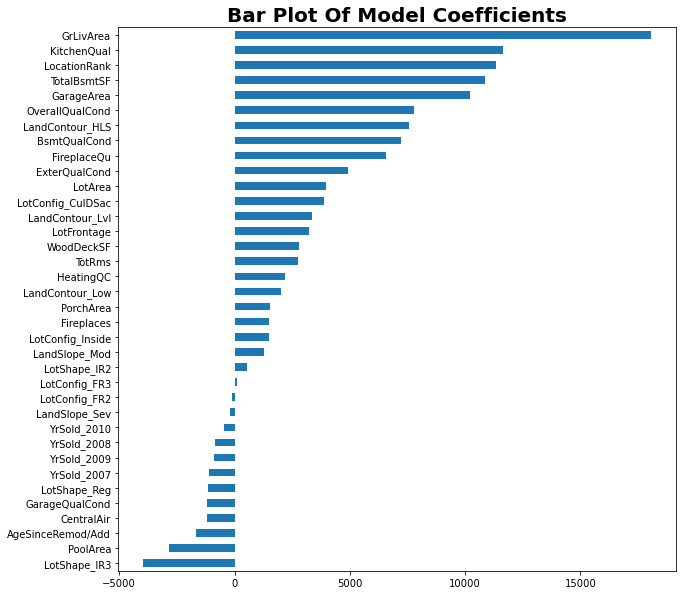

In [90]:
# visualise coefficients of fitted lassocv model
plt.title('Bar Plot Of Model Coefficients', fontweight='semibold', fontsize=20)
pd.Series(lassocv_final.coef_, index=X.columns).sort_values(ascending=True).plot.barh(figsize=(10, 10));

**Observation:**

Looking at the sign and magnitude of the coefficients:

- The top 5 predictors of housing sale price are Above Ground Living Area, Kitchen Quality, Location Rank, Total Basement Area, and Garage Area.
- For area-based features (such as Lot Area, Above Ground Living Area, Total Basement Area, Garage Area, Wood Deck Area, Porch Area, Pool Area), as expected, the larger the area, the higher the sale price (except for Pool Area).
- For quality/condition-based features (such as Overall, Exterior, Basement, Garage, Heating, Kitchen, Fireplace), as expected too, the better the score, the higher the sale price (except for Garage).
- It is peculiar to note that a garage that is of a higher quality and better condition, a larger pool area, and central air conditioning result in a lower housing sale price. This runs counter-intuitive to common understanding and needs further investigation.
- It is interesting to see that when compared to houses sold in 2006 (base year), houses sold in 2007, 2008, 2009, and 2010 have fetched lower sale prices.

In [91]:
# predict targets for entire dataset with fitted lassocv model
y_pred = lassocv_final.predict(Z)

In [92]:
# get scores on entire dataset with fitted lassocv model
r2 = metrics.r2_score(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)

print('Lasso Regression R-Squared:', r2)
print('Lasso Regression Mean Squared Error:', mse)

Lasso Regression R-Squared: 0.8290367069383496
Lasso Regression Mean Squared Error: 1073902381.5657308


**Observation:**<br>
The LassoCV model is able to explain 82.9% of the variability in the housing sale price with the housing features.<br>
The LassoCV model has a calculated mean of the squared distance between true values and predicted values of 1,073,902,381.

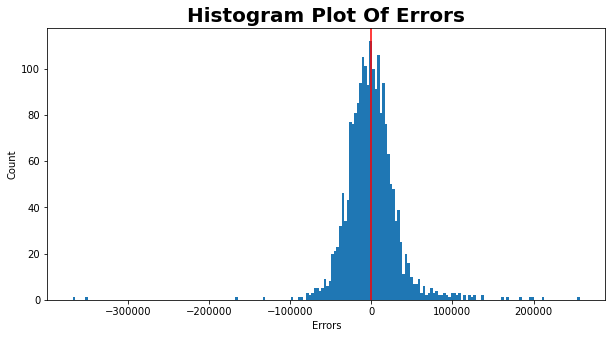

In [93]:
# check for normality of errors (residuals)
plt.figure(figsize=(10, 5))
plt.title('Histogram Plot Of Errors', fontweight='semibold', fontsize=20)
plt.xlabel('Errors')
plt.ylabel('Count')
plt.axvline(0, color='red')
plt.hist(y - y_pred, bins=200);

**Observation:** The errors appear to be normally distributed. This is ideal.

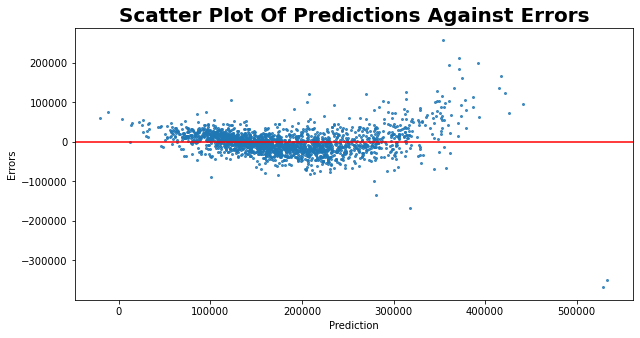

In [94]:
# check for equal variance of errors (residuals) aka homoscedasticity
plt.figure(figsize=(10, 5))
plt.title('Scatter Plot Of Predictions Against Errors', fontweight='semibold', fontsize=20)
plt.xlabel('Prediction')
plt.ylabel('Errors')
plt.axhline(0, color='red')
plt.scatter(y_pred, y - y_pred, s=4, alpha=0.8);

**Observation:** The errors do not appear to have equal variance. This is not ideal.

### Null Model

In [95]:
# devise null model for dataset
print('Baseline Target (Mean Sale Price) of Dataset:', y.mean())

# make into an array for scoring
y_mean = np.full(y.shape, y.mean())

Baseline Target (Mean Sale Price) of Dataset: 181484.6092682927


In [96]:
# get scores on dataset with null model
r2 = metrics.r2_score(y, y_mean)
mse = metrics.mean_squared_error(y, y_mean)

print('Baseline R-Squared:', r2)
print('Baseline Mean Squared Error:', mse)

Baseline R-Squared: 0.0
Baseline Mean Squared Error: 6281479271.567818


**Observation:** A comparison of the scores between the LassoCV model and the Null model shows that the LassoCV model has outperformed the the Null model by achieving a higher R-Squared and a lower Mean Squared Error.

## Kaggle Prediction

In [97]:
# import dataset
test = pd.read_csv('../data/test.csv')

In [98]:
# check number of rows and cols
test.shape

(878, 80)

In [99]:
# remove spaces from column names
test.columns = test.columns.str.replace(' ', '')

In [100]:
# show first 5 rows
test.head()

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [101]:
# create a copy of the dataset with just the feature columns of interest
X_k = test[['LotArea', 'LotFrontage', 'LotShape', 'LotConfig', 'LandContour', 'LandSlope', 
            'Neighborhood', 'Condition1', 'Condition2', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 
            'Functional', 'YearRemod/Add', 'BsmtQual', 'BsmtCond', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 
            'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
            'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageArea', 'GarageQual', 'GarageCond', 
            'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'YrSold']].copy()

In [102]:
# show first 5 rows
X_k.head()

,LotArea,LotFrontage,LotShape,LotConfig,LandContour,LandSlope,Neighborhood,Condition1,Condition2,OverallQual,OverallCond,ExterQual,ExterCond,Functional,YearRemod/Add,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold
0,9142,69.0,Reg,Inside,Lvl,Gtl,OldTown,Norm,Norm,6,8,TA,Fa,Typ,1950,Fa,TA,1020,Gd,N,1928,0,0,2,0,4,2,Fa,0,NaN,440,Po,Po,0,60,112,0,0,0,2006
1,9662,NaN,IR1,Inside,Lvl,Gtl,Sawyer,Norm,Norm,5,4,TA,TA,Typ,1977,Gd,TA,1967,TA,Y,1967,0,0,2,0,6,2,TA,0,NaN,580,TA,TA,170,0,0,0,0,0,2006
2,17104,58.0,IR1,Inside,Lvl,Gtl,Gilbert,Norm,Norm,7,5,Gd,TA,Typ,2006,Gd,Gd,654,Ex,Y,1496,1,0,2,1,3,1,Gd,1,Gd,426,TA,TA,100,24,0,0,0,0,2006
3,8520,60.0,Reg,Inside,Lvl,Gtl,OldTown,Norm,Norm,5,6,Gd,TA,Typ,2006,TA,TA,968,TA,Y,968,0,0,1,0,2,1,TA,0,NaN,480,Fa,TA,0,0,184,0,0,0,2007
4,9500,NaN,IR1,Inside,Lvl,Gtl,NAmes,Norm,Norm,6,5,TA,TA,Typ,1963,Gd,TA,1394,Gd,Y,1394,1,0,1,1,3,1,TA,2,Gd,514,TA,TA,0,76,0,0,185,0,2009


In [103]:
# check for null values
X_k.isnull().sum().to_frame().T

,LotArea,LotFrontage,LotShape,LotConfig,LandContour,LandSlope,Neighborhood,Condition1,Condition2,OverallQual,OverallCond,ExterQual,ExterCond,Functional,YearRemod/Add,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold
0,0,160,0,0,0,0,0,0,0,0,0,0,0,0,0,25,25,0,0,0,0,0,0,0,0,0,0,0,0,422,0,45,45,0,0,0,0,0,0,0


In [104]:
# impute null values in LotFrontage column in place with the mean
X_k['LotFrontage'].replace(np.nan, X_k['LotFrontage'].mean(), inplace=True)

# fill null values in all Bsmt columns with 0 as these houses do not have a basement
X_k['BsmtQual'] = X_k['BsmtQual'].fillna(0)
X_k['BsmtCond'] = X_k['BsmtCond'].fillna(0)

# fill null values in FireplaceQu column with 0 as these houses do not have a fireplace
X_k['FireplaceQu'] = X_k['FireplaceQu'].fillna(0)

# fill null values in GaraqeQual column and GarageCond column with 0 as these houses do not have a garage
X_k['GarageQual'] = X_k['GarageQual'].fillna(0)
X_k['GarageCond'] = X_k['GarageCond'].fillna(0)

In [105]:
# recheck for null values
X_k.isnull().sum().to_frame().T

,LotArea,LotFrontage,LotShape,LotConfig,LandContour,LandSlope,Neighborhood,Condition1,Condition2,OverallQual,OverallCond,ExterQual,ExterCond,Functional,YearRemod/Add,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [106]:
# check column dtypes
X_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        878 non-null    int64  
 1   LotFrontage    878 non-null    float64
 2   LotShape       878 non-null    object 
 3   LotConfig      878 non-null    object 
 4   LandContour    878 non-null    object 
 5   LandSlope      878 non-null    object 
 6   Neighborhood   878 non-null    object 
 7   Condition1     878 non-null    object 
 8   Condition2     878 non-null    object 
 9   OverallQual    878 non-null    int64  
 10  OverallCond    878 non-null    int64  
 11  ExterQual      878 non-null    object 
 12  ExterCond      878 non-null    object 
 13  Functional     878 non-null    object 
 14  YearRemod/Add  878 non-null    int64  
 15  BsmtQual       878 non-null    object 
 16  BsmtCond       878 non-null    object 
 17  TotalBsmtSF    878 non-null    int64  
 18  HeatingQC 

In [107]:
# convert column with dtypes 'float64' to 'int64'
for col in X_k.columns:
    if X_k[col].dtypes == 'float64':
        X_k[col] = X_k[col].astype('int64')

In [108]:
# recheck column dtypes
X_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LotArea        878 non-null    int64 
 1   LotFrontage    878 non-null    int64 
 2   LotShape       878 non-null    object
 3   LotConfig      878 non-null    object
 4   LandContour    878 non-null    object
 5   LandSlope      878 non-null    object
 6   Neighborhood   878 non-null    object
 7   Condition1     878 non-null    object
 8   Condition2     878 non-null    object
 9   OverallQual    878 non-null    int64 
 10  OverallCond    878 non-null    int64 
 11  ExterQual      878 non-null    object
 12  ExterCond      878 non-null    object
 13  Functional     878 non-null    object
 14  YearRemod/Add  878 non-null    int64 
 15  BsmtQual       878 non-null    object
 16  BsmtCond       878 non-null    object
 17  TotalBsmtSF    878 non-null    int64 
 18  HeatingQC      878 non-null   

In [109]:
# add feature-engineered columns
X_k['AgeSinceRemod/Add'] = X_k['YrSold'] - X_k['YearRemod/Add']
X_k['TotRms'] = X_k['BsmtFullBath'] + X_k['BsmtHalfBath'] + X_k['FullBath'] + X_k['HalfBath'] + \
X_k['BedroomAbvGr'] + X_k['KitchenAbvGr']
X_k['PorchArea'] = X_k['OpenPorchSF'] + X_k['EnclosedPorch'] + X_k['3SsnPorch'] + X_k['ScreenPorch']

In [110]:
# show first 5 rows
X_k.head()

,LotArea,LotFrontage,LotShape,LotConfig,LandContour,LandSlope,Neighborhood,Condition1,Condition2,OverallQual,OverallCond,ExterQual,ExterCond,Functional,YearRemod/Add,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,AgeSinceRemod/Add,TotRms,PorchArea
0,9142,69,Reg,Inside,Lvl,Gtl,OldTown,Norm,Norm,6,8,TA,Fa,Typ,1950,Fa,TA,1020,Gd,N,1928,0,0,2,0,4,2,Fa,0,0,440,Po,Po,0,60,112,0,0,0,2006,56,8,172
1,9662,69,IR1,Inside,Lvl,Gtl,Sawyer,Norm,Norm,5,4,TA,TA,Typ,1977,Gd,TA,1967,TA,Y,1967,0,0,2,0,6,2,TA,0,0,580,TA,TA,170,0,0,0,0,0,2006,29,10,0
2,17104,58,IR1,Inside,Lvl,Gtl,Gilbert,Norm,Norm,7,5,Gd,TA,Typ,2006,Gd,Gd,654,Ex,Y,1496,1,0,2,1,3,1,Gd,1,Gd,426,TA,TA,100,24,0,0,0,0,2006,0,8,24
3,8520,60,Reg,Inside,Lvl,Gtl,OldTown,Norm,Norm,5,6,Gd,TA,Typ,2006,TA,TA,968,TA,Y,968,0,0,1,0,2,1,TA,0,0,480,Fa,TA,0,0,184,0,0,0,2007,1,4,184
4,9500,69,IR1,Inside,Lvl,Gtl,NAmes,Norm,Norm,6,5,TA,TA,Typ,1963,Gd,TA,1394,Gd,Y,1394,1,0,1,1,3,1,TA,2,Gd,514,TA,TA,0,76,0,0,185,0,2009,46,7,261


In [111]:
# find a way to determine the location desirability of each neighborhood

# create a True/False column to indicate if each house is near/adjacent to a positive off-site feature
X_k['PosOffSiteFeature'] = np.where(
    (X_k['Condition1'] == 'PosN') | 
    (X_k['Condition1'] == 'PosA') | 
    (X_k['Condition2'] == 'PosN') | 
    (X_k['Condition2'] == 'PosA'), 1, 0)

# create a True/False column to indicate if each house is of typical functionality
X_k['TypFunctional'] = np.where(
    (X_k['Functional'] == 'Typ'), 1, 0)

# create two columns that score the overall quality and overall condition of each house against the max score of 10
X_k['OverallQualScore'] = X_k['OverallQual'] / 10
X_k['OverallCondScore'] = X_k['OverallCond'] / 10

# represent ordinal values in exterior quality and exterior condition with numerical values
X_k['ExterQualScore'] = X_k['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
X_k['ExterCondScore'] = X_k['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

# create two columns that score the exterior quality and exterior condition of each house against the max score of 5
X_k['ExterQualScore'] = X_k['ExterQualScore'] / 5
X_k['ExterCondScore'] = X_k['ExterCondScore'] / 5

# create a column that scores the desirability of each house based on its proximity to a 
# positive off-site feature, typical functionality, overall quality score, overall condition score, 
# exterior quality score, and exterior condition score
X_k['DesirabilityScore'] = X_k['PosOffSiteFeature'] + X_k['TypFunctional'] + X_k['OverallQualScore'] + \
X_k['OverallCondScore'] + X_k['ExterQualScore'] + X_k['ExterCondScore']

# group houses by neighborhood and sort neighborhoods by their mean desirability score from smallest to largest
X_k.groupby('Neighborhood')['DesirabilityScore'].mean().sort_values()

# split the 28 neighborhoods into 4 ranks according to their mean desirability score
# neighborhoods with a smaller mean desirability score will be allocated a lower rank
# neighborhoods with a larger mean desirability score will be allocated a higher rank
rank1_k = X_k.groupby('Neighborhood')['DesirabilityScore'].mean().sort_values()[0:7].index
rank2_k = X_k.groupby('Neighborhood')['DesirabilityScore'].mean().sort_values()[7:14].index
rank3_k = X_k.groupby('Neighborhood')['DesirabilityScore'].mean().sort_values()[14:21].index
rank4_k = X_k.groupby('Neighborhood')['DesirabilityScore'].mean().sort_values()[21:28].index

# define a function to insert the location rank of each house based on its neighborhood
def insert_location_rank_k(nbh):
    if nbh in rank1_k:
        return 1
    elif nbh in rank2_k:
        return 2
    elif nbh in rank3_k:
        return 3
    elif nbh in rank4_k:
        return 4

# apply the function to the Neighborhood column to create a new column
X_k['LocationRank'] = X_k['Neighborhood'].apply(insert_location_rank_k)

In [112]:
# drop columns that were manufactured for the determination of the location rank of each neighborhood
X_k.drop(columns=['PosOffSiteFeature', 'TypFunctional', 'OverallQualScore', 'OverallCondScore', 
                  'ExterQualScore', 'ExterCondScore', 'DesirabilityScore'], inplace=True)

In [113]:
# show first 5 rows
X_k.head()

,LotArea,LotFrontage,LotShape,LotConfig,LandContour,LandSlope,Neighborhood,Condition1,Condition2,OverallQual,OverallCond,ExterQual,ExterCond,Functional,YearRemod/Add,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,AgeSinceRemod/Add,TotRms,PorchArea,LocationRank
0,9142,69,Reg,Inside,Lvl,Gtl,OldTown,Norm,Norm,6,8,TA,Fa,Typ,1950,Fa,TA,1020,Gd,N,1928,0,0,2,0,4,2,Fa,0,0,440,Po,Po,0,60,112,0,0,0,2006,56,8,172,2
1,9662,69,IR1,Inside,Lvl,Gtl,Sawyer,Norm,Norm,5,4,TA,TA,Typ,1977,Gd,TA,1967,TA,Y,1967,0,0,2,0,6,2,TA,0,0,580,TA,TA,170,0,0,0,0,0,2006,29,10,0,1
2,17104,58,IR1,Inside,Lvl,Gtl,Gilbert,Norm,Norm,7,5,Gd,TA,Typ,2006,Gd,Gd,654,Ex,Y,1496,1,0,2,1,3,1,Gd,1,Gd,426,TA,TA,100,24,0,0,0,0,2006,0,8,24,3
3,8520,60,Reg,Inside,Lvl,Gtl,OldTown,Norm,Norm,5,6,Gd,TA,Typ,2006,TA,TA,968,TA,Y,968,0,0,1,0,2,1,TA,0,0,480,Fa,TA,0,0,184,0,0,0,2007,1,4,184,2
4,9500,69,IR1,Inside,Lvl,Gtl,NAmes,Norm,Norm,6,5,TA,TA,Typ,1963,Gd,TA,1394,Gd,Y,1394,1,0,1,1,3,1,TA,2,Gd,514,TA,TA,0,76,0,0,185,0,2009,46,7,261,2


In [114]:
# create a column for the interaction term between overall quality and overall condition
X_k['OverallQualCond'] = X_k['OverallQual'] * X_k['OverallCond']

# represent ordinal values in exterior quality and exterior condition with numerical values
X_k['ExterQual'] = X_k['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
X_k['ExterCond'] = X_k['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

# create a column for the interaction term between exterior quality and exterior condition
X_k['ExterQualCond'] = X_k['ExterQual'] * X_k['ExterCond']

# represent ordinal values in basement quality and basement condition with numerical values 
# (filled NA with 0 before for houses with no basement)
X_k['BsmtQual'] = X_k['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 0: 0})
X_k['BsmtCond'] = X_k['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 0: 0})

# create a column for the interaction term between basement quality and basement condition
X_k['BsmtQualCond'] = X_k['BsmtQual'] * X_k['BsmtCond']

# represent ordinal values in garage quality and garage condition with numerical values 
# (filled NA with 0 before for houses with no garage)
X_k['GarageQual'] = X_k['GarageQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 0: 0})
X_k['GarageCond'] = X_k['GarageCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 0: 0})

# create a column for the interaction term between garage quality and garage condition
X_k['GarageQualCond'] = X_k['GarageQual'] * X_k['GarageCond']

# represent ordinal values in heating quality and condition with numerical values
X_k['HeatingQC'] = X_k['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

# represent ordinal values in kitchen quality with numerical values
X_k['KitchenQual'] = X_k['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

# represent ordinal values in fireplace quality with numerical values (filled NA with 0 before for 
# houses with no fireplace)
X_k['FireplaceQu'] = X_k['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 0: 0})

# represent nominal values in central air conditioning with numerical values
X_k['CentralAir'] = X_k['CentralAir'].map({'Y': 1, 'N': 0})

In [115]:
# drop unnecessary columns
X_k.drop(columns=['Condition1', 'Condition2', 'Functional', 'YearRemod/Add', 
                  'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                  'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], inplace=True)

In [116]:
# show first 5 rows
X_k.head()

,LotArea,LotFrontage,LotShape,LotConfig,LandContour,LandSlope,Neighborhood,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,PoolArea,YrSold,AgeSinceRemod/Add,TotRms,PorchArea,LocationRank,OverallQualCond,ExterQualCond,BsmtQualCond,GarageQualCond
0,9142,69,Reg,Inside,Lvl,Gtl,OldTown,6,8,3,2,2,3,1020,4,0,1928,2,0,0,440,1,1,0,0,2006,56,8,172,2,48,6,6,1
1,9662,69,IR1,Inside,Lvl,Gtl,Sawyer,5,4,3,3,4,3,1967,3,1,1967,3,0,0,580,3,3,170,0,2006,29,10,0,1,20,9,12,9
2,17104,58,IR1,Inside,Lvl,Gtl,Gilbert,7,5,4,3,4,4,654,5,1,1496,4,1,4,426,3,3,100,0,2006,0,8,24,3,35,12,16,9
3,8520,60,Reg,Inside,Lvl,Gtl,OldTown,5,6,4,3,3,3,968,3,1,968,3,0,0,480,2,3,0,0,2007,1,4,184,2,30,12,9,6
4,9500,69,IR1,Inside,Lvl,Gtl,NAmes,6,5,3,3,4,3,1394,4,1,1394,3,2,4,514,3,3,0,0,2009,46,7,261,2,30,9,12,9


In [117]:
# export finalised dataset
X_k.to_csv('../data/test_final.csv', index=False)

In [118]:
# create a copy of the dataset with just the features needed for predicting
x_k = X_k[['LotArea', 'LotFrontage', 'LotShape', 'LotConfig', 'LandContour', 'LandSlope', 'LocationRank', 
        'OverallQualCond', 'ExterQualCond', 'AgeSinceRemod/Add', 'BsmtQualCond', 'TotalBsmtSF', 'HeatingQC', 
        'CentralAir', 'GrLivArea', 'TotRms', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageArea', 
        'GarageQualCond', 'WoodDeckSF', 'PorchArea', 'PoolArea', 'YrSold']].copy()

In [119]:
# one-hot encode categorical columns
x_k = pd.get_dummies(x_k, columns=['LotShape', 'LotConfig', 'LandContour', 'LandSlope', 'YrSold'], drop_first=True)

In [120]:
# perform feature scaling
z_k = scaler.transform(x_k)

In [121]:
# predict targets for kaggle dataset with fitted lassocv model
y_pred_k = lassocv_final.predict(z_k)

In [122]:
# round predictions to 4 decimal places
y_pred_k = np.round(y_pred_k, decimals=4)

# make into a dataframe for exporting
predictions = pd.DataFrame({'Id': test['Id'].values, 'SalePrice': y_pred_k})

In [123]:
# export predictions
predictions.to_csv('../data/predictions.csv', index=False)

![score](../media/kaggle.png)

## Results & Analysis

A total of three linear regression models (Ordinary Least Squares, Ridge, Lasso) were evaluated to determine the best one for predicting housing prices. The entire dataset was first split into a training dataset and a testing dataset before proceeding to do modelling.

Cross validation was done on the training dataset for all three models. The results obtained were comparable across all three models. All three models had an R-Squared of around 0.78 and a Mean Squared Error of around 1.28 billion.

Further to that, all three models were fitted on the training dataset and testing dataset to obtain their performance scores. Once again, the results obtained were similar across all three models. All three models had an R-Squared of around 0.81 on the training dataset and around 0.83 for the testing dataset. The Mean Squared Error of all three models was around 1.11 billion on the training dataset and around 1.08 billion on the testing dataset.

The Lasso model was selected as the model of choice as it scored the highest R-Squared and the lowest Mean Squared Error on the testing dataset. When the Lasso model was finally trained on the entire dataset, the final R-Squared obtained was 0.82 while the final Mean Squared Error obtained was 1.07 billion. The Lasso model also outperformed the Null model, which gave a baseline R-Squared of 0.00 and a baseline Mean Squared Error of 6.28 billion.

The 5 biggest determinants of housing sale price were found to be Above Ground Living Area, Kitchen Quality, Location Rank, Total Basement Area, and Garage Area. Variables that measure some form of area have emerged as stronger predictors of housing sale price than any other variables like, for instance, those that measure quality or condition. Location Rank, which was engineered from a set of underlying features to serve as a surrogate measure of a neighbourhood's desirability, was one of the most important determinants of housing sale price; this affirms the fact that the neighbourhood plays a significant role in deciding the property's sale price. Despite there being many variables that measure quality, the Kitchen Quality was the only one that stood out as being a major influencer of housing sale price.

## Recommendations & Conclusions

Interested real estate buyers and sellers may utilise this model to predict the price of a house in Ames, Iowa after entering the required set of property- and neighbourhood-specific traits. This will allow firstly, the buyers to know if they will be under- or over-paying for a house at the current quoted market price, and secondly, the sellers to know if they are under- or over-asking for their house with reference to how much a house like theirs has sold for historically. Hence, both buyers and sellers will be able to make more informed buy-sell decisions off of the model.

With regards to the top predictors of housing sale price, some recommendations can be made to real estate buyers and sellers. For buyers who wish to buy their house at a bargain, they should go for houses that are generally small across all facets, situated in an inferior neighbourhood, and have a poor quality kitchen, as these factors will have the largest effect on bringing down the price. For sellers who wish to sell their house at a premium, they could spend some money sprucing up the quality of their kitchen, seeing that houses with a higher quality kitchen tend to command higher prices.

In conclusion, housing sale price prediction based on the principles of hedonic pricing, where both internal and external influencing factors of the item are considered, has proven to be a reliable method. Moving forward, data on more neighbourhood-specific traits (such as proximity to public transportation, crime rate, socioeconomic status of households, and level of air or water pollution), which is lacking in the provided data sources, can be collected to not only elucidate the extent to which these traits affect housing sale price but also to improve the predictive ability of the model.

## References

https://www.investopedia.com/terms/h/hedonicpricing.asp<br>
https://link.springer.com/referenceworkentry/10.1007%2F978-94-007-0753-5_1279<br>
https://www.ecosystemvaluation.org/hedonic_pricing.htm